# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW/GOAL**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Develop a predictive model to estimate the resale values of usered cars based on the car data provided. this involves selecting and extracting relevent features such as make, model, age, mileage, condition, and additional car or market demand(if available) that influece car prices.**

#### Regression techniques are used to quantify the relationship between these features and the car's sale prices. allowing for the identification of the most significant predictors of price. this model will also facitate feature importance analysis to determine which variables have the most impact of the pricing of used cars, thus translating these insights into actionable business stregies.


## Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

start with basic data quality check, and followed by detailed EDA analysis

## 1 Data Quality Check (Basic Statistics)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
%matplotlib inline

In [5]:
vehicles1 = pd.read_csv('data/vehicles.csv')

In [6]:
vehicles1.head(5)

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [7]:
print(vehicles1.info())
vehicles1.describe()
vehicles1.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(426880, 18)

### 1.1 Duplicate Values Check

In [12]:
duplicate_rows = vehicles1.duplicated().sum()
duplicate_rows

178795

### 1.2 Missing Values Check 

The dataset contains a substantial number of missing values.
Simply dropping all values sounds a imprudent decision as it could significantly reduce the dataset's size and potentially bias the results. 
I will take steps to clean all missing values.


In [11]:
# check the percentage of null values by variable 
vehicles1_nulls = vehicles1.isnull().sum()  
percentage_nulls = (vehicles1_nulls/vehicles1.shape[0]) *100
print(percentage_nulls)


price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
dtype: float64


### 1.3 Check Unique Values

In [13]:
# Check for cardianlity/unique values in each column  
vehicles1.nunique()

price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
drive                3
type                13
paint_color         12
dtype: int64

### IMMIDIATE DATA CLEARNING ACTIONS: 

Drop features that have high missing values and their levels of relevence.

1.1 Drop 'VIN' due to its irrelevence to predit car prices and high proportion of missing values

Missing VIN numbers does raise the concern of data integrity. 
It does raise my caution to handle missing data and data preprocessing 

1.2 Drop 'size' due to the fact it has over 70% of missing values. 

1.3 Drop 'region' and 'state'
Why? currently the dataset doean't provide demand and supply data by region and also the two features have high cardniality.

Other features including Manufactos and Model are more important factors to decide a second car's price. I decided to do further exploration analysis 


In [9]:
vehicles = vehicles1.drop(['id','VIN', 'size', 'region', 'state'], axis=1, inplace=True)

### 1.4 Outliers Identification

### a. Many cars' prices are zeros

Action A: Remove all records with cars' price is zero. why? as they do not contribute to understanding car pricing dynamics. Consequently, approximately 33,000 records were eliminated. This action not only helps in focusing the analysis on relevant data but also assists in reducing issues related to missing values identified previously. 

### b. exeme price, year and odometer outliers

Action B: remove their outliers based on their quantile distributions.


In [50]:
# ACTION A
vehicles = vehicles1[vehicles1['price'] != 0]
vehicles.shape

(393985, 13)

In [16]:
# Action B Remove Price Outliers 

Q1 = vehicles['price'].quantile(0.25)
Q3 = vehicles['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers in 'price'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers from 'price'
vehicles_nooutliers = vehicles[(vehicles['price'] >= lower_bound) & (vehicles['price'] <= upper_bound)]
print("Shape of the DataFrame without price outliers:", vehicles_nooutliers.shape)


Shape of the DataFrame without price outliers: (386206, 13)


In [17]:
vehicles_nooutliers.describe()

price           year      odometer
count  386206.000000  385218.000000  3.839940e+05
mean    17777.616184    2010.933495  9.983530e+04
std     12821.823750       9.543098  2.067866e+05
min         1.000000    1900.000000  0.000000e+00
25%      6999.000000    2008.000000  3.950800e+04
50%     14995.000000    2013.000000  8.881650e+04
75%     26950.000000    2017.000000  1.363890e+05
max     58448.000000    2022.000000  1.000000e+07

In [18]:
# Action B Remove Odometers Outliers

Q1o = vehicles_nooutliers['odometer'].quantile(0.25)
Q3o = vehicles_nooutliers['odometer'].quantile(0.75)
IQRo = Q3o - Q1o

# Define bounds for outliers in 'price'
lower_boundo = Q1o - 1.5 * IQRo
upper_boundo = Q3o + 1.5 * IQRo

# Filter out outliers from 'price'
odometer_nooutliers = vehicles_nooutliers[(vehicles_nooutliers['odometer'] >= lower_boundo) & (vehicles_nooutliers['odometer'] <= upper_boundo)]
print("Shape of the DataFrame without odometer outliers:", odometer_nooutliers.shape)


Shape of the DataFrame without odometer outliers: (380253, 13)


In [19]:
odometer_nooutliers.describe()

price           year       odometer
count  380253.000000  379328.000000  380253.000000
mean    17854.273636    2011.024056   91884.596540
std     12818.833691       9.452095   60910.730658
min         1.000000    1900.000000       0.000000
25%      7000.000000    2008.000000   39082.000000
50%     14995.000000    2013.000000   87801.000000
75%     26990.000000    2017.000000  134941.000000
max     58448.000000    2022.000000  281700.000000

In [20]:
# Action B Continue removing year Outliers

Q1y = odometer_nooutliers['year'].quantile(0.25)
Q3y = odometer_nooutliers['year'].quantile(0.75)
IQRy = Q3y - Q1y

# Define bounds for outliers in 'price'
lower_boundy = Q1y - 1.5 * IQRy
upper_boundy = Q3o + 1.5 * IQRy

# Filter out outliers from 'price'
year_nooutliers = odometer_nooutliers[(odometer_nooutliers['year'] >= lower_boundy) & (odometer_nooutliers['year'] <= upper_boundy)]
print("Shape of the DataFrame without year outliers:", year_nooutliers.shape)

Shape of the DataFrame without year outliers: (364710, 13)


In [21]:
year_nooutliers.describe()

price           year       odometer
count  364710.000000  364710.000000  364710.000000
mean    18020.257328    2012.446374   92486.572214
std     12816.733439       5.478801   60789.078410
min         1.000000    1995.000000       0.000000
25%      7300.000000    2009.000000   39553.250000
50%     15000.000000    2013.000000   88664.000000
75%     26990.000000    2017.000000  135457.750000
max     58448.000000    2022.000000  281700.000000

### 1.5  Should we conside all Salvaged Car Records(  when Condition  = "Savage" or Title Status is in ( 'salvage', 'Lien', 'Missing', 'Parts only')

### NO

Why?

1) Market Value Impact: 

Salvaged cars typically have much lower market values due to extensive damages. Including them can distort average price assessments and market analyses.

2) Data Relevance: 
Assuming the analysis aims to reflect the standard car market, salvaged cars may not be relevant, as they do not represent typical consumer transactions.

3) Regulatory and Insurance Complexity: 
Salvaged vehicles are subject to unique regulatory and insurance standards that could unnecessarily complicate analyses focused on regular vehicles.

4) Statistical Influence: 
Being potential outliers, salvaged cars can skew predictive modeling, affecting the accuracy of analyses intended for non-salvaged vehicles.

In [23]:
# removing abnormal car condition or title.
Vehicles = year_nooutliers[~((year_nooutliers['condition'] == 'salvage') | (year_nooutliers['title_status'].isin(['salvage', 'lien', 'missing', 'parts only'])))]
print("Shape of the DataFrame after clearning Savaged:", Vehicles.shape)

Shape of the DataFrame after clearning Savaged: (359235, 13)


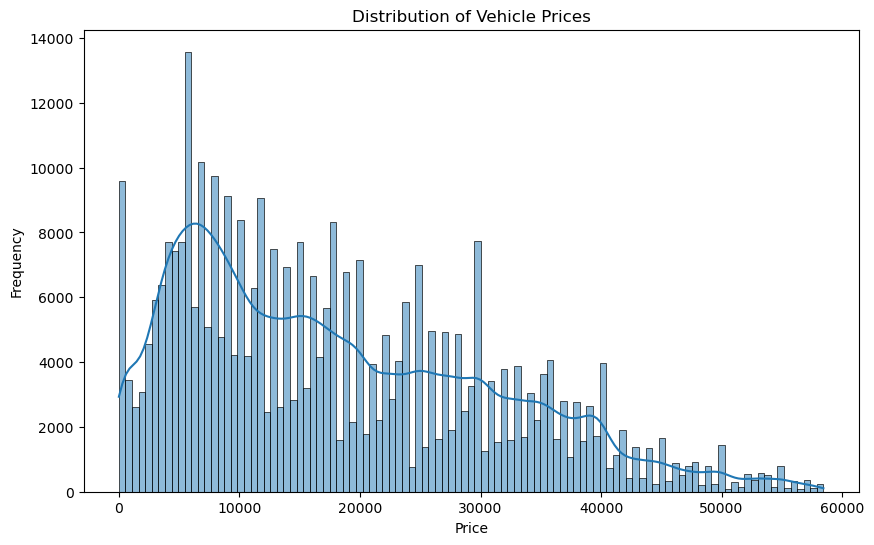

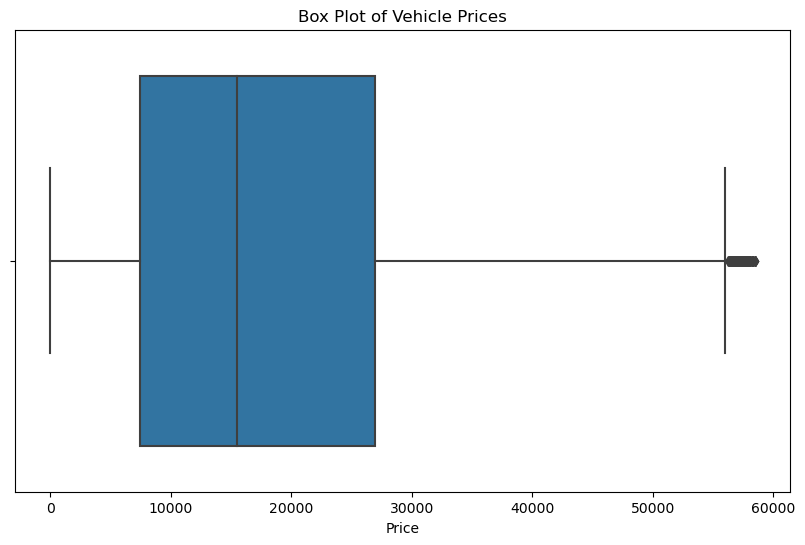

In [27]:
# plot the targe varible 'price' after basic data cleaning. 
# using Histogram and boxplot plotting the target variable 'price' to understand its distribution and outliers

plt.figure(figsize=(10, 6))
sns.histplot(Vehicles['price'], kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Vehicles['price'])
plt.title('Box Plot of Vehicle Prices')
plt.xlabel('Price')
plt.show()

### 1.6  Should we conside all Cars that values are smaller than 2000 dollars? 

NO

Car dealers typically do not see a profit margin when selling cars priced under $2,000. 
Given the associated costs of repairs, storage, inventory management, and sales administration
the price threshold likely needs to be higher to ensure profitability. but for this excise.
I picked 2000 dollars as the threshhold value.

In [51]:
# remove extemely low priced car ( less than 2000 dollors)
Vehicles = Vehicles[(Vehicles['price'] >= 2000)]

# Print the shape of the DataFrame after excluding low-priced cars
print("Shape of the DataFrame after excluding cars priced below $2000:", Vehicles.shape)

Shape of the DataFrame after excluding cars priced below $2000: (341874, 13)


In [52]:
Vehicles.describe()

price           year       odometer
count  341874.000000  341874.000000  341874.000000
mean    19004.964651    2012.535551   92102.388128
std     12511.859945       5.375791   60328.572291
min      2000.000000    1995.000000       0.000000
25%      8200.000000    2009.000000   39331.250000
50%     16249.500000    2014.000000   88310.000000
75%     27990.000000    2017.000000  135000.000000
max     58448.000000    2022.000000  281700.000000

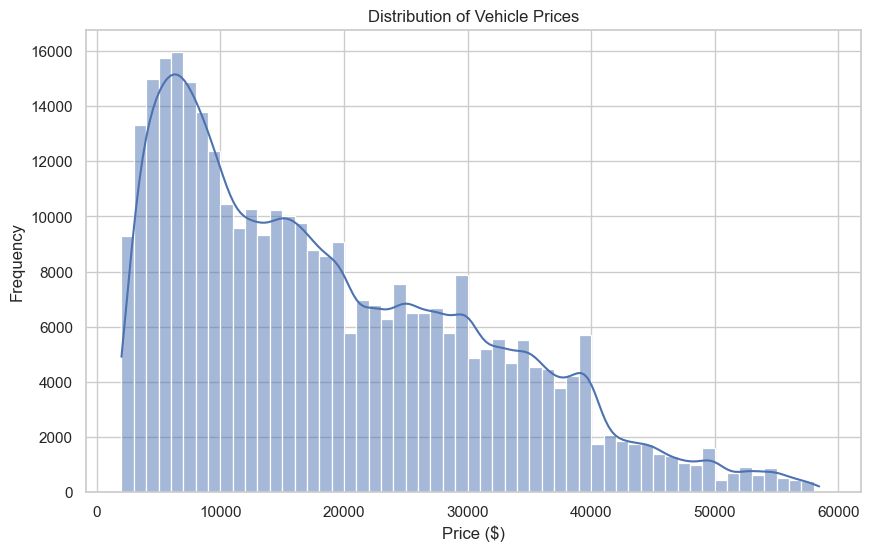

In [388]:
# re Plotting the target variable'price' distribution.

plt.figure(figsize=(10, 6))

# Creating a histogram with a bin width of 1000 dollars
sns.histplot(Vehicles['price'], kde=True, binwidth=1000)

# Adding a title and labels
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [389]:
# Check the missing values by variable again

Vehicles_nulls1 = Vehicles.isnull().sum()  # check null values's distributions again
percentage_nulls1 = (Vehicles_nulls1/Vehicles.shape[0]) *100
print(percentage_nulls1)

price            0.000000
year             0.000000
manufacturer     2.849295
model            0.780112
condition       37.633748
cylinders       41.460889
fuel             0.604024
odometer         0.000000
title_status     1.687756
transmission     0.413310
drive           30.124256
type            20.033989
paint_color     28.084031
dtype: float64


## 2. Detailed EDA 

### 2.1 Panda Profiling Anlaysis

In [34]:
I have my profiling report uploaded on Github.
#!pip install pandas-profiling
#!pip install pydantic-settings
#!pip install pydantic==2.5.2
#from pandas_profiling import ProfileReport
#from pydantic_settings import BaseSettings

#profile = ProfileReport(cars)
#profile.to_file(output_file='output.html')

#profile



###  profiling insights

It flags two alerts and one useful information

1) missing values from 'manufacturer', 'model', 'fuel', transmission' are insignificant based on missing values matrix report.so I can safely drop them next step. 

2) missing values from condition, cylinders, drive and type and paint_color are significant. we need do further exploration to determine the handling methods. see the nulity correlationship illustrated by heatmap. for instance, 

   high nulity correlationship between 'paint_color' and 'type, drive and type, and paint-color. , cyliner, and drive, 
   condition and cylinders, condition, and type, and paint color. 
 
   
3) imbalance alert for 'fuel', 'transmission' variables. The distributions of categorical variables are heavily skewed towards one or more categories. 

        Actions: 1. conduct further plots to check the proportion of observations in each cateogry based on count
                 2. find rationale to combine categories or imputations based on mode or prices 
            

4) high correlations and skewed among price, year, and odometer.odometer is negatively correlated with year and price. year is postively related to prace. 

        Actions: 1. do histogram on price, year and odometer
                 2. conduct correlation analysis


5) high cardinality from 'Model' and ' manufacturer' 

### 2.1.1 Remove Null Values based on profiling insights

Why? : due to the low percentage of missing values.

In [385]:
# removing missing values from the variable specified below

columns_with_nulls_to_drop = ['title_status', 'model', 'transmission', 'manufacturer', 'fuel']
Vehicles_cleaned1 = Vehicles.dropna(subset=columns_with_nulls_to_drop)
print("Shape of cleaned vehicles:", Vehicles_cleaned1.shape)

Shape of cleaned vehicles: (321067, 13)


### 2.1.2 Group Manufactuers as a grouped feature to reduce its cardinality.

In [ ]:
# regroup manufacturers into a new categorical varible due to high cardniality.

# Create a dictionary from the series where manufacturers below 1% threshold are set to 'Others'
manufacturer_mapping = {manufacturer: ('Others' if percent < 1 else manufacturer) for manufacturer, percent in manufacturer_counts.items()}

# Map the manufacturers in the original DataFrame to the new grouping
Vehicles_cleaned1['manufacturer_grouped'] = Vehicles_cleaned1['manufacturer'].map(manufacturer_mapping)
manufacturer_counts = Vehicles_cleaned1['manufacturer'].value_counts(normalize=True) * 100

In [56]:
carsEDA = Vehicles_cleaned1.drop(columns=[ 'model', 'manufacturer', 'title_status'])
carsEDA.columns

Index(['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'drive', 'type', 'paint_color', 'manufacturer_grouped'],
      dtype='object')

### 2.2: Exploring all Categoircal Variables using Plots

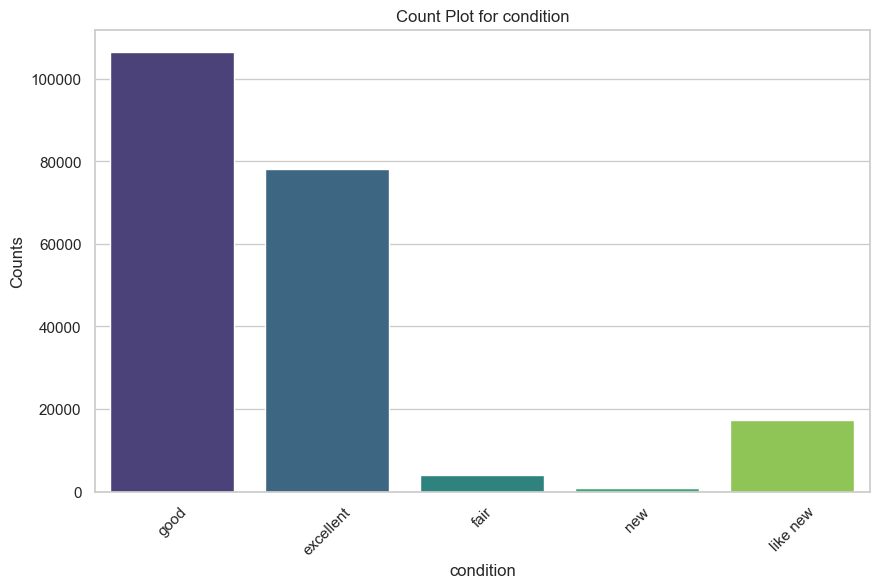

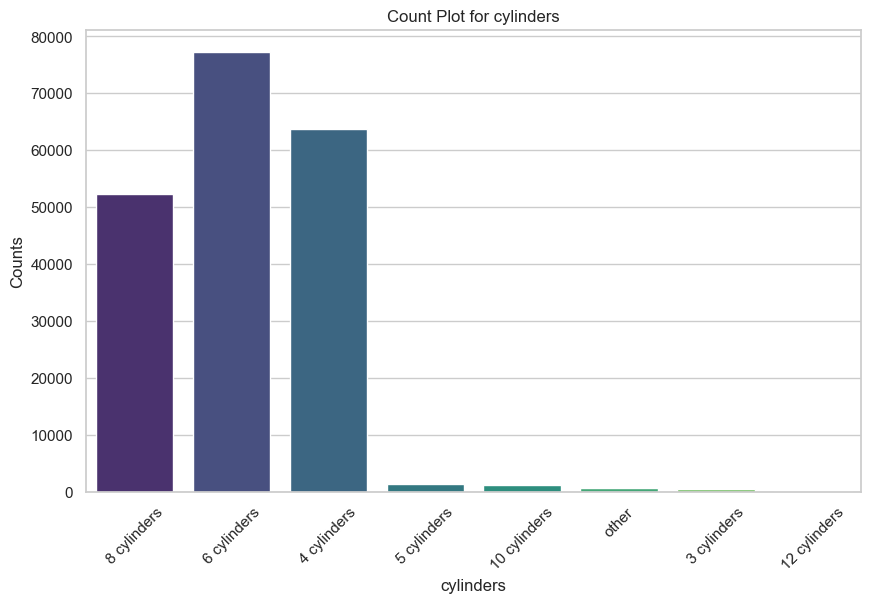

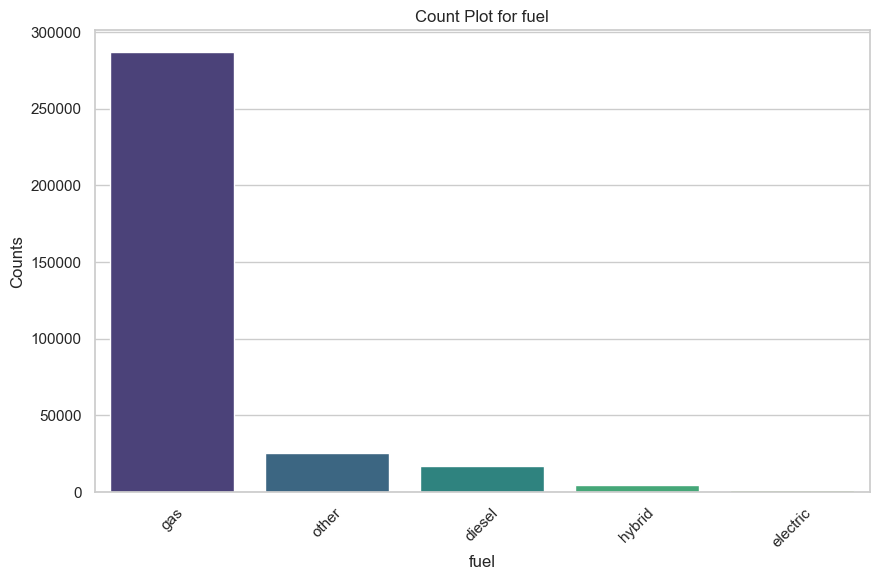

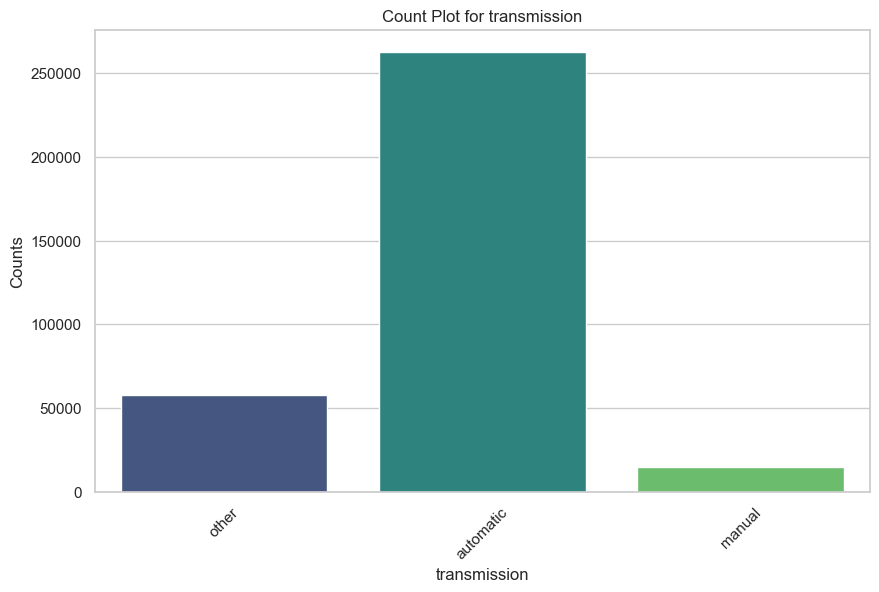

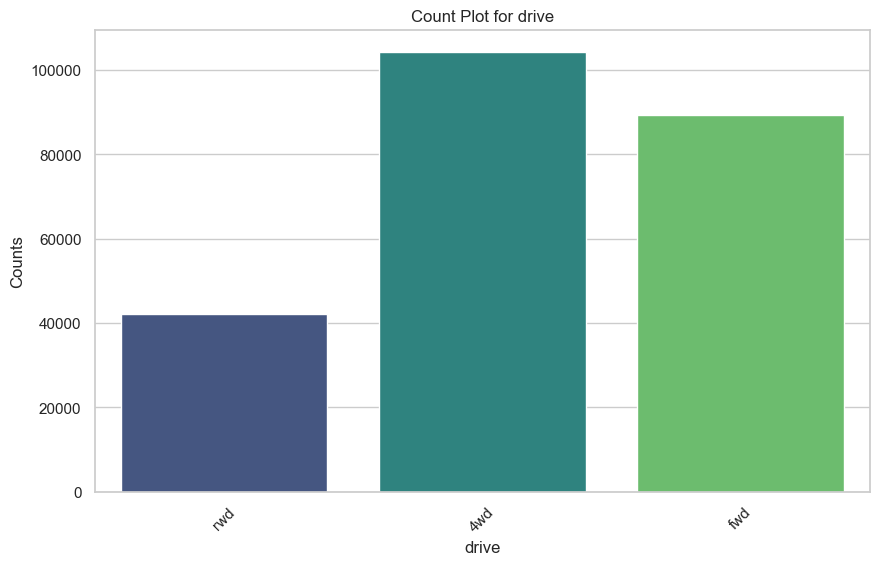

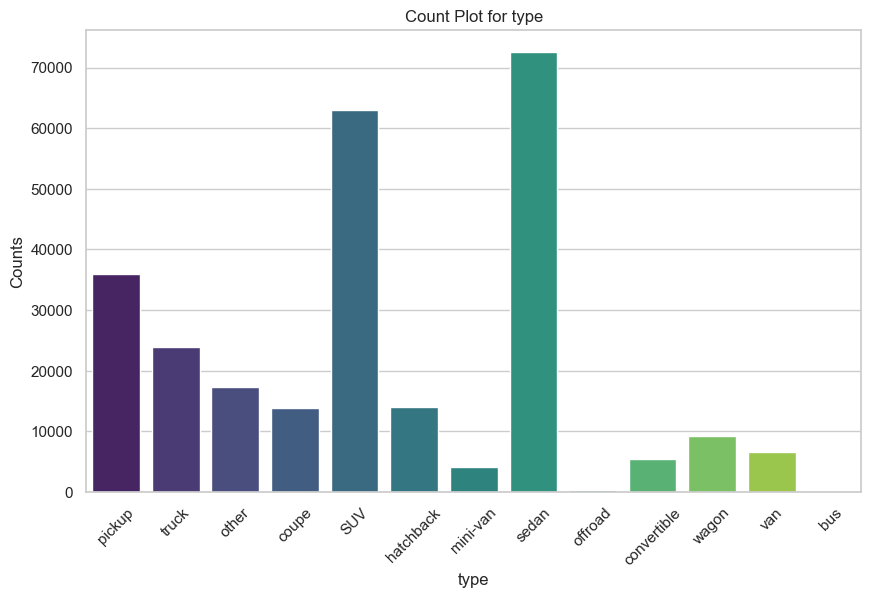

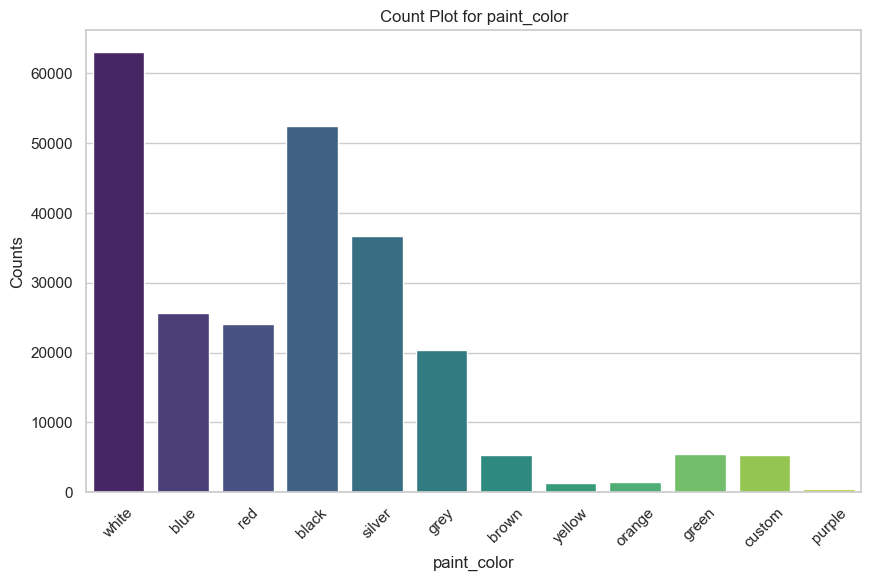

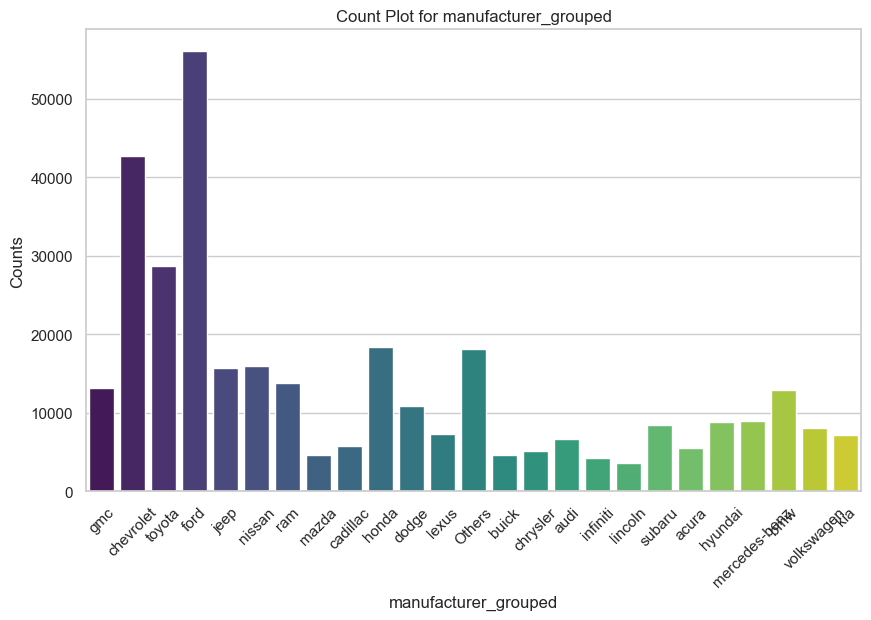

In [125]:
## Plot all categorical variables based on counts.

def plot_all_categorical_counts(df):
    """
    Plot count plots for all categorical (object type) columns in the DataFrame.
    """
    # Filter out the object type columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Iterate over the categorical columns and create a count plot for each
    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=45)
        plt.ylabel('Counts')
        plt.show()

plot_all_categorical_counts(carsEDA)

###  Data Preparation Actions for categorical Variables



1 Cylinders/conditon: convert them into a numerical format. use median to impute unknown



2.Drive/Type/Color: significant portion of data are missing but overall balanced distribution ( no dominate type). so I'll lable their missing values as 'unknown' as a separate categories. later using one hot coding 

 



### Action #1: Convert cyclinders into a numerical variable

In [57]:
# convert cylinder into a numerical varible.
cyclinder_counts = carsEDA['cylinders'].value_counts()
cyclinder_counts

cylinders
6 cylinders     73859
4 cylinders     59865
8 cylinders     50791
5 cylinders      1322
10 cylinders      976
other             560
3 cylinders       375
12 cylinders       50
Name: count, dtype: int64

In [58]:
# filter a small percentage of other values due to the difficulty of finding a number for other
df_filtered = carsEDA[carsEDA['cylinders'] != 'other']
df_filtered.shape

(320507, 11)

In [59]:
df = df_filtered.copy()  # Create a copy to avoid setting with copy warning

# Mapping dictionary
cylinder_mapping = {
    '3 cylinders': 3,
    '4 cylinders': 4,
    '5 cylinders': 5,
    '6 cylinders': 6,
    '8 cylinders': 8,
    '10 cylinders': 10,
    '12 cylinders': 12,
    'other': 0,  # or another specific value
    
}

# Apply mapping
df['cylinders_numeric'] = df['cylinders'].map(cylinder_mapping)

print(df[['cylinders', 'cylinders_numeric']])

          cylinders  cylinders_numeric
27      8 cylinders                8.0
28      8 cylinders                8.0
29      8 cylinders                8.0
30      8 cylinders                8.0
31      6 cylinders                6.0
...             ...                ...
426875  6 cylinders                6.0
426876          NaN                NaN
426877          NaN                NaN
426878  6 cylinders                6.0
426879          NaN                NaN

[320507 rows x 2 columns]


In [60]:
# repeat steps to convert condition into a numerical variable
condition_counts = df['condition'].value_counts()
condition_counts

condition
good         104531
excellent     76009
like new      16523
fair           2747
new             696
Name: count, dtype: int64

In [61]:
# Mapping dictionary
condition_mapping = {
    'fair': 1,
    'good': 2,
    'excellent': 3,
    'like new': 4,
    'new': 5,    
}

# Apply mapping
df['condition_numeric'] = df['condition'].map(condition_mapping)


In [62]:
# drop orginal variables
df.drop(columns=['cylinders', 'condition'], inplace=True)
print(df.columns)

Index(['price', 'year', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'manufacturer_grouped', 'cylinders_numeric',
       'condition_numeric'],
      dtype='object')


### Action #2: drop all missing values from drive, type, and paint_color
The model's performance is very bad after coding all missing values as 'unknown'. so 
I decided to drop all missing values from 'drive', 'type', and 'paint_color'

Only cylinder_numeric and condition_numeric have missing values. their missing values will be imputated using their median values after splitting the dataset into train and test dataset to avoid data leakage. 

In [111]:
# drop null values from the varibles specified below 
df = df.dropna(subset=[ 'drive','type', 'paint_color' ])
print("Shape of the DataFrame after Profile analysis", df.shape)

Shape of the DataFrame after Profile analysis (173325, 12)


In [64]:
# chekcd null again
df_cleaned_nulls = df.isnull().sum()  # check null values's distributions 
percentage_nulls3 = (df_cleaned_nulls/df.shape[0]) *100
print(percentage_nulls3)

price                    0.000000
year                     0.000000
fuel                     0.000000
odometer                 0.000000
transmission             0.000000
drive                    0.000000
type                     0.000000
paint_color              0.000000
manufacturer_grouped     0.000000
cylinders_numeric       24.336362
condition_numeric       29.338526
dtype: float64


### 2.3: Exploring all numerical Variables.

4) skewed among price, year, and odometer
        Actions: 
                1. Improve skewness via log transformed price and odometer
                2. exclude high odometer car records to imporve central tendency of log_odometer and price.
                
5) Positive correlations among numerical variables. Espeically year is postively related to prace. and Odometer is negatively related to price

        Actions: 1. do histogram on price, year and odometer to understand distributions, and bar charts for cylinders and car 
        condition
                 2. plot catogiral varibles with the target varible price using median prices
                 
                 3. conduct correlation analysis among all numerical varibles.


In [65]:
df.head()

price    year fuel  odometer transmission drive    type paint_color  \
31  15000  2013.0  gas  128000.0    automatic   rwd   truck       black   
32  27990  2012.0  gas   68696.0        other   4wd  pickup       black   
33  34590  2016.0  gas   29499.0        other   4wd  pickup      silver   
34  35000  2019.0  gas   43000.0    automatic   4wd   truck        grey   
35  29990  2016.0  gas   17302.0        other   4wd  pickup         red   

   manufacturer_grouped  cylinders_numeric  condition_numeric  
31                 ford                6.0                3.0  
32                  gmc                8.0                2.0  
33            chevrolet                6.0                2.0  
34               toyota                6.0                3.0  
35            chevrolet                6.0                2.0

Text(0, 0.5, 'Frequency')

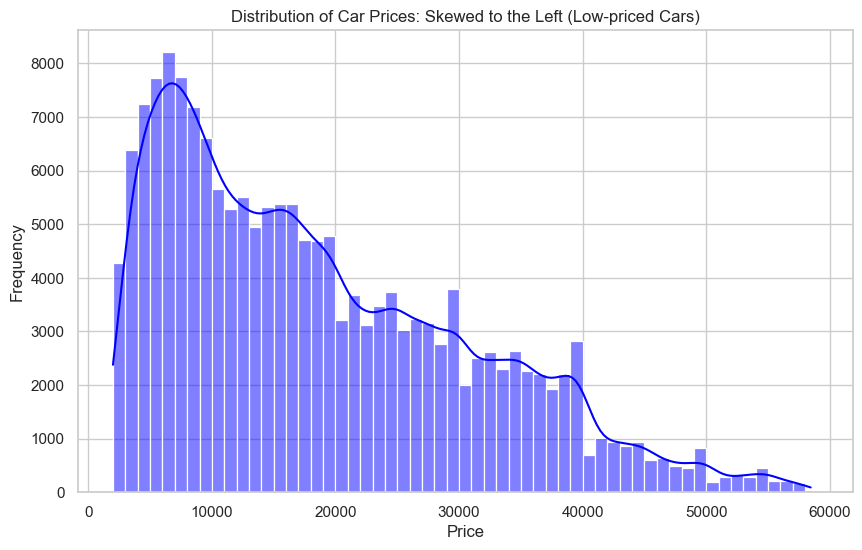

In [115]:

# Create a histogram of the 'price' target variable, each bin is equal to $1000 
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['price'], kde=True, color='blue', binwidth=1000)  # KDE plot overlays the histogram with a density plot

# Add informative titles and labels
plt.title('Distribution of Car Prices: Skewed to the Left (Low-priced Cars)')
plt.xlabel('Price')
plt.ylabel('Frequency')

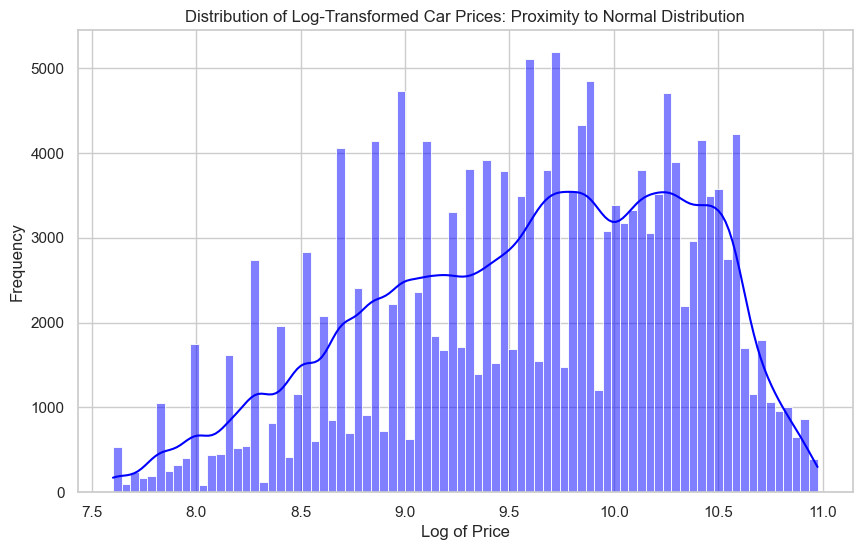

In [116]:
# Create a histogram of the log-transformed 'price' target variables to improve its central tendency

log_prices = np.log1p(df['price'])

plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(log_prices, kde=True, color='blue')  # KDE plot overlays the histogram with a density plot

# Add titles and labels
plt.title('Distribution of Log-Transformed Car Prices: Proximity to Normal Distribution')
plt.xlabel('Log of Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Text(0, 0.5, 'Frequency')

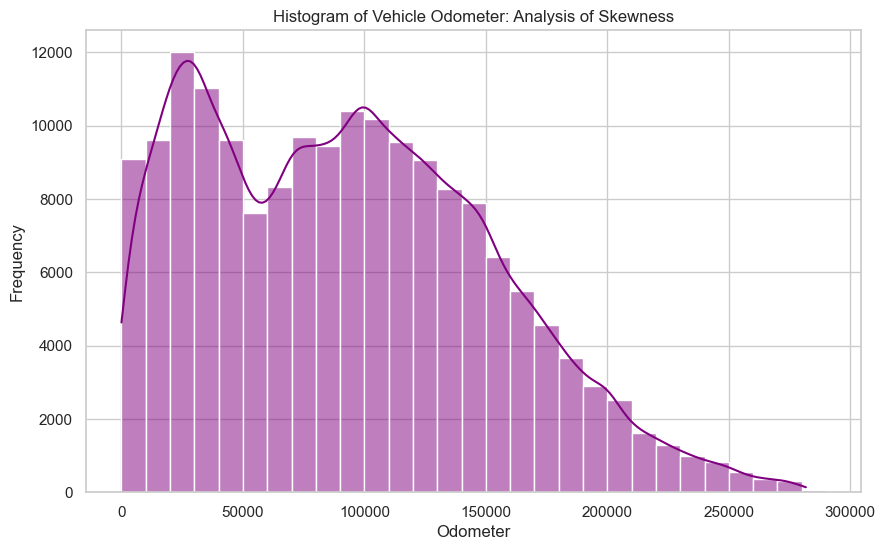

In [117]:
# Create a histogram of the log-transformed 'odometer'. Each bin is equal to 10,000 mileage

sns.set(style="whitegrid")

# Create a histogram of the 'price' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['odometer'], kde=True, color='purple', binwidth=10000)  # KDE plot overlays the histogram with a density plot

# Add titles and labels
plt.title('Histogram of Vehicle Odometer: Analysis of Skewness')
plt.xlabel('Odometer')
plt.ylabel('Frequency')

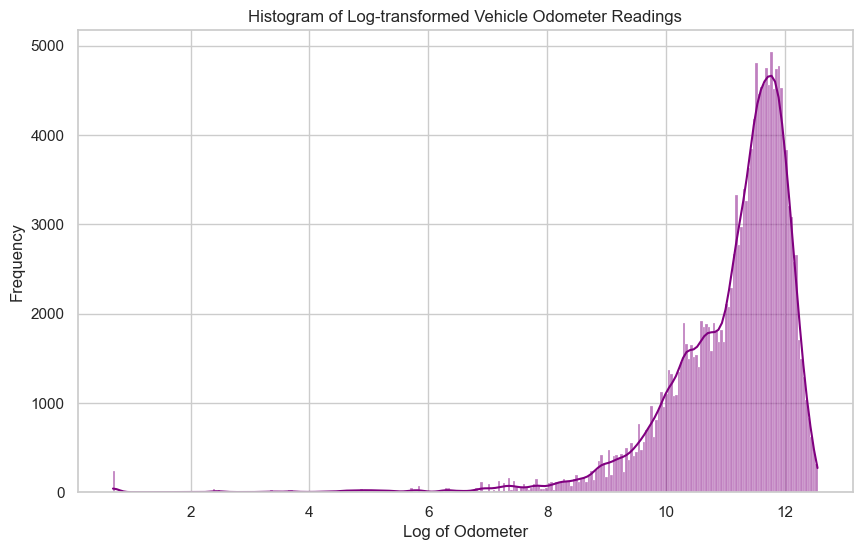

In [123]:
# Plot histogram of the log-transformed 'odometer' to improve central tendency

df['log_odometer'] = np.log1p(df['odometer'].replace(0, np.nan))


plt.figure(figsize=(10, 6))
sns.histplot(df['log_odometer'].dropna(), kde=True, color='purple')  # Dropping NaN values resulting from log(0)

# Adding a title and labels
plt.title('Histogram of Log-transformed Vehicle Odometer Readings')
plt.xlabel('Log of Odometer')
plt.ylabel('Frequency')

# Show plot
plt.show()

#### there is a long tail on the left, suggest to trim Odometer records to further improve its central tendancy

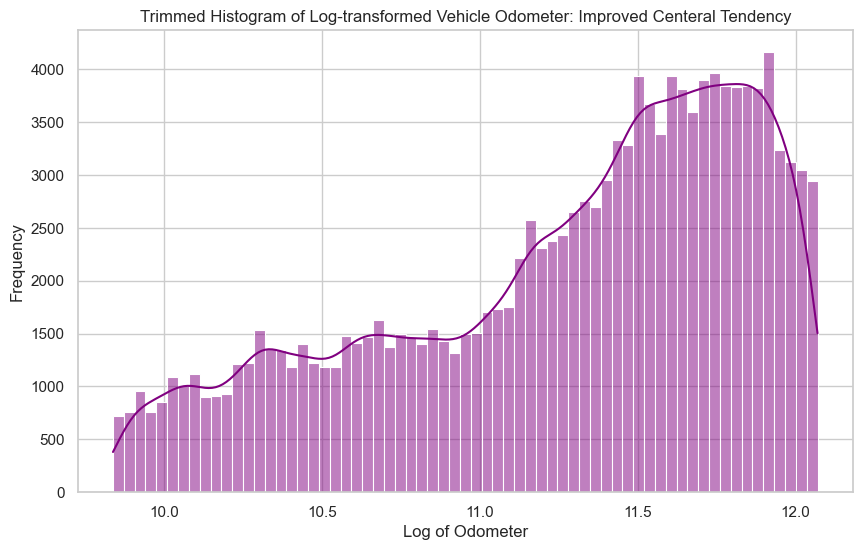

In [122]:
# Plot log_odometer excluding values outside thresholds defined below to improve the central tendency.
low_threshold = df['log_odometer'].quantile(0.1)
high_threshold = df['log_odometer'].quantile(0.9)
trimmed_df = df[(df['log_odometer'] >= low_threshold) & (df['log_odometer'] <= high_threshold)]

# You can plot the new histogram to see the distribution of the trimmed data
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the 'year' column
low_threshold = df['log_odometer'].quantile(0.1)
high_threshold = df['log_odometer'].quantile(0.9)

plt.figure(figsize=(10, 6))
sns.histplot(trimmed_df['log_odometer'], kde=True, color='purple')
plt.title('Trimmed Histogram of Log-transformed Vehicle Odometer: Improved Centeral Tendency')
plt.xlabel('Log of Odometer')
plt.ylabel('Frequency')
plt.show()


In [119]:
# filter orginal dataset using log_odometer threshholds defined above 

df['log_odometer'] = np.log(df['odometer'] + 1)  # Adding 1 to avoid log(0)

# Calculate the thresholds based on log-transformed odometer
low_threshold = df['log_odometer'].quantile(0.1)
high_threshold = df['log_odometer'].quantile(0.9)

# Filter the original DataFrame based on these thresholds
filtered_df = df[(df['log_odometer'] >= low_threshold) & (df['log_odometer'] <= high_threshold)]

# Optionally, you can remove the log_odometer column if it's no longer needed
filtered_df = filtered_df.drop(columns=['log_odometer'])
filtered_df.shape

(138662, 11)

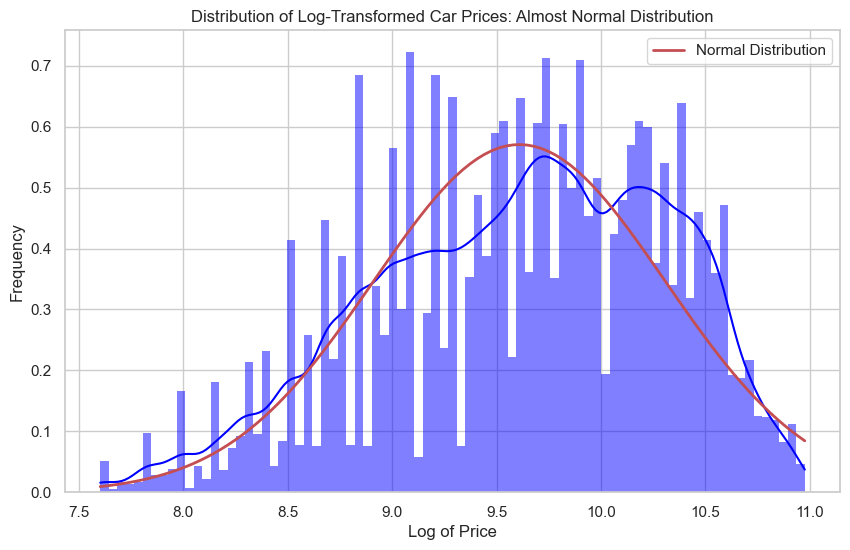

In [120]:
# Replot log_price using the trimed dataframe above and show the central tendency  

from scipy.stats import norm
log_prices = np.log1p(filtered_df['price'])

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the histogram with KDE
sns.histplot(log_prices, kde=True, color='blue', stat="density", linewidth=0)

# Calculate the mean and standard deviation for the log-transformed prices
mu, std = log_prices.mean(), log_prices.std()

# Generate points on the x axis between the minimum and maximum of log_prices
x = np.linspace(log_prices.min(), log_prices.max(), 100)

# Calculate the normal distribution values
p = norm.pdf(x, mu, std)

# Plot the normal distribution curve
plt.plot(x, p, 'r', linewidth=2, label='Normal Distribution')

# Add titles and labels
plt.title('Distribution of Log-Transformed Car Prices: Almost Normal Distribution')
plt.xlabel('Log of Price')
plt.ylabel('Frequency')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

Text(0, 0.5, 'Frequency')

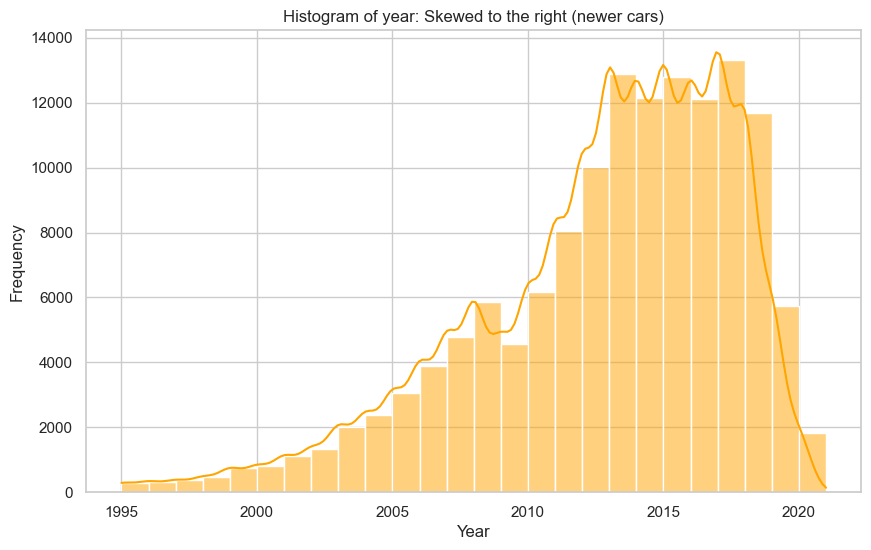

In [137]:
# plot year. and set each bin size = 1 year

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(filtered_df['year'], kde=True, color='orange', binwidth=1)  # KDE plot overlays the histogram with a density plot

# Add titles and labels
plt.title('Histogram of year: Skewed to the right (newer cars)')
plt.xlabel('Year')
plt.ylabel('Frequency')

In [148]:
# remove left tail values
cars_cleaned = filtered_df[(filtered_df['year'] >= 2005) & (filtered_df['year'] < 2021)]

# Optionally, you can check the updated shape of the DataFrame and preview the remaining data
print("Shape of DataFrame after removing years over 1995 and smaller than 2021:", cars_cleaned.shape)
print(cars_cleaned.head())

Shape of DataFrame after removing years over 1995 and smaller than 2021: (128832, 11)
    price    year fuel  odometer transmission drive    type paint_color  \
31  15000  2013.0  gas  128000.0    automatic   rwd   truck       black   
32  27990  2012.0  gas   68696.0        other   4wd  pickup       black   
33  34590  2016.0  gas   29499.0        other   4wd  pickup      silver   
34  35000  2019.0  gas   43000.0    automatic   4wd   truck        grey   
36  38590  2011.0  gas   30237.0        other   rwd   other         red   

   manufacturer_grouped  cylinders_numeric  condition_numeric  
31                 ford                6.0                3.0  
32                  gmc                8.0                2.0  
33            chevrolet                6.0                2.0  
34               toyota                6.0                3.0  
36            chevrolet                8.0                2.0  


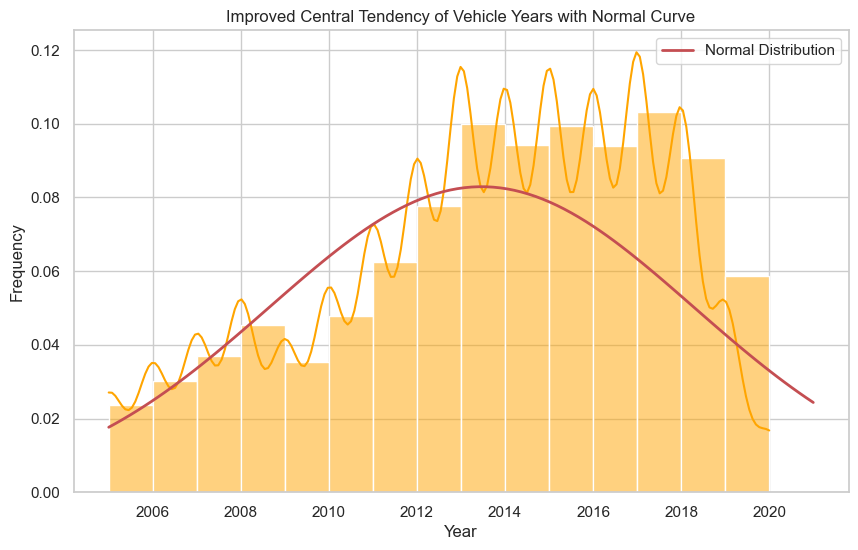

In [149]:
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the histogram with KDE
sns.histplot(cars_cleaned['year'], kde=True, color='orange', binwidth=1, stat="density")

# Calculate the mean and standard deviation for the 'year' data
mu, std = cars_cleaned['year'].mean(), filtered_df['year'].std()

# Generate points on the x axis that cover the range of 'year' data
x = np.linspace(cars_cleaned['year'].min(), filtered_df['year'].max(), 100)

# Calculate the normal distribution values based on mu and std
p = norm.pdf(x, mu, std)

# Plot the normal distribution curve
plt.plot(x, p, 'r', linewidth=2, label='Normal Distribution')

# Add titles and labels
plt.title('Improved Central Tendency of Vehicle Years with Normal Curve')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

In [390]:
# Create a barchart of the 'cyclinder numeric'

import plotly.express as px

cylinder_counts = cars_cleaned['cylinders_numeric'].value_counts().sort_index()

# Create a DataFrame from the counts for easier plotting
data = pd.DataFrame({
    'Cylinder': cylinder_counts.index,
    'Frequency': cylinder_counts.values
})

# Create a bar chart using Plotly Express
fig = px.bar(data, x='Cylinder', y='Frequency',
             title='Most of Cars have 4, 6 or 8 Cylinders',
             labels={'Cylinder': 'Number of Cylinders', 'Frequency': 'Frequency'},
             color='Cylinder',  # Optional: use the cylinder count as a color dimension
             template='plotly_white')  # Optional: choose a style

fig.update_layout(xaxis_type='category')  # This ensures the x-axis treats numbers as categorical data
fig.show()

In [151]:
# Create a barchart of the 'condition_numeric'
condition_counts = cars_cleaned['condition_numeric'].value_counts().sort_index()

# Create a DataFrame from the counts for easier plotting
data = pd.DataFrame({
    'Condition': condition_counts.index,
    'Frequency': condition_counts.values
})

# Create a bar chart using Plotly Express
fig = px.bar(data, x='Condition', y='Frequency',
             title='Majority of Cars with Good to Excellent Condition',
             labels={'Condition': 'Condition Rating', 'Frequency': 'Frequency'},
             # Applying a different color sequence, for example 'Viridis'
             color='Condition',
             color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_layout(xaxis_type='category')  # This ensures the x-axis treats numbers as categorical data
fig.show()

### 2.3: Exploring all Variables with the target variable 'price' relationship

In [154]:
# plot median price and counts by year using a combined chart

mean_year = cars_cleaned['year'].mean()
std_year = cars_cleaned['year'].std()

# Generate points on the x axis between the minimum and maximum year
x = np.linspace(cars_cleaned['year'].min(), cars_cleaned['year'].max(), 100)

# Calculate the normal distribution values
normal_distribution = norm.pdf(x, mean_year, std_year)

# Adjust normal distribution values to match the scale of the bar chart
normal_distribution_scaled = normal_distribution * max(year_counts.values) / max(normal_distribution)

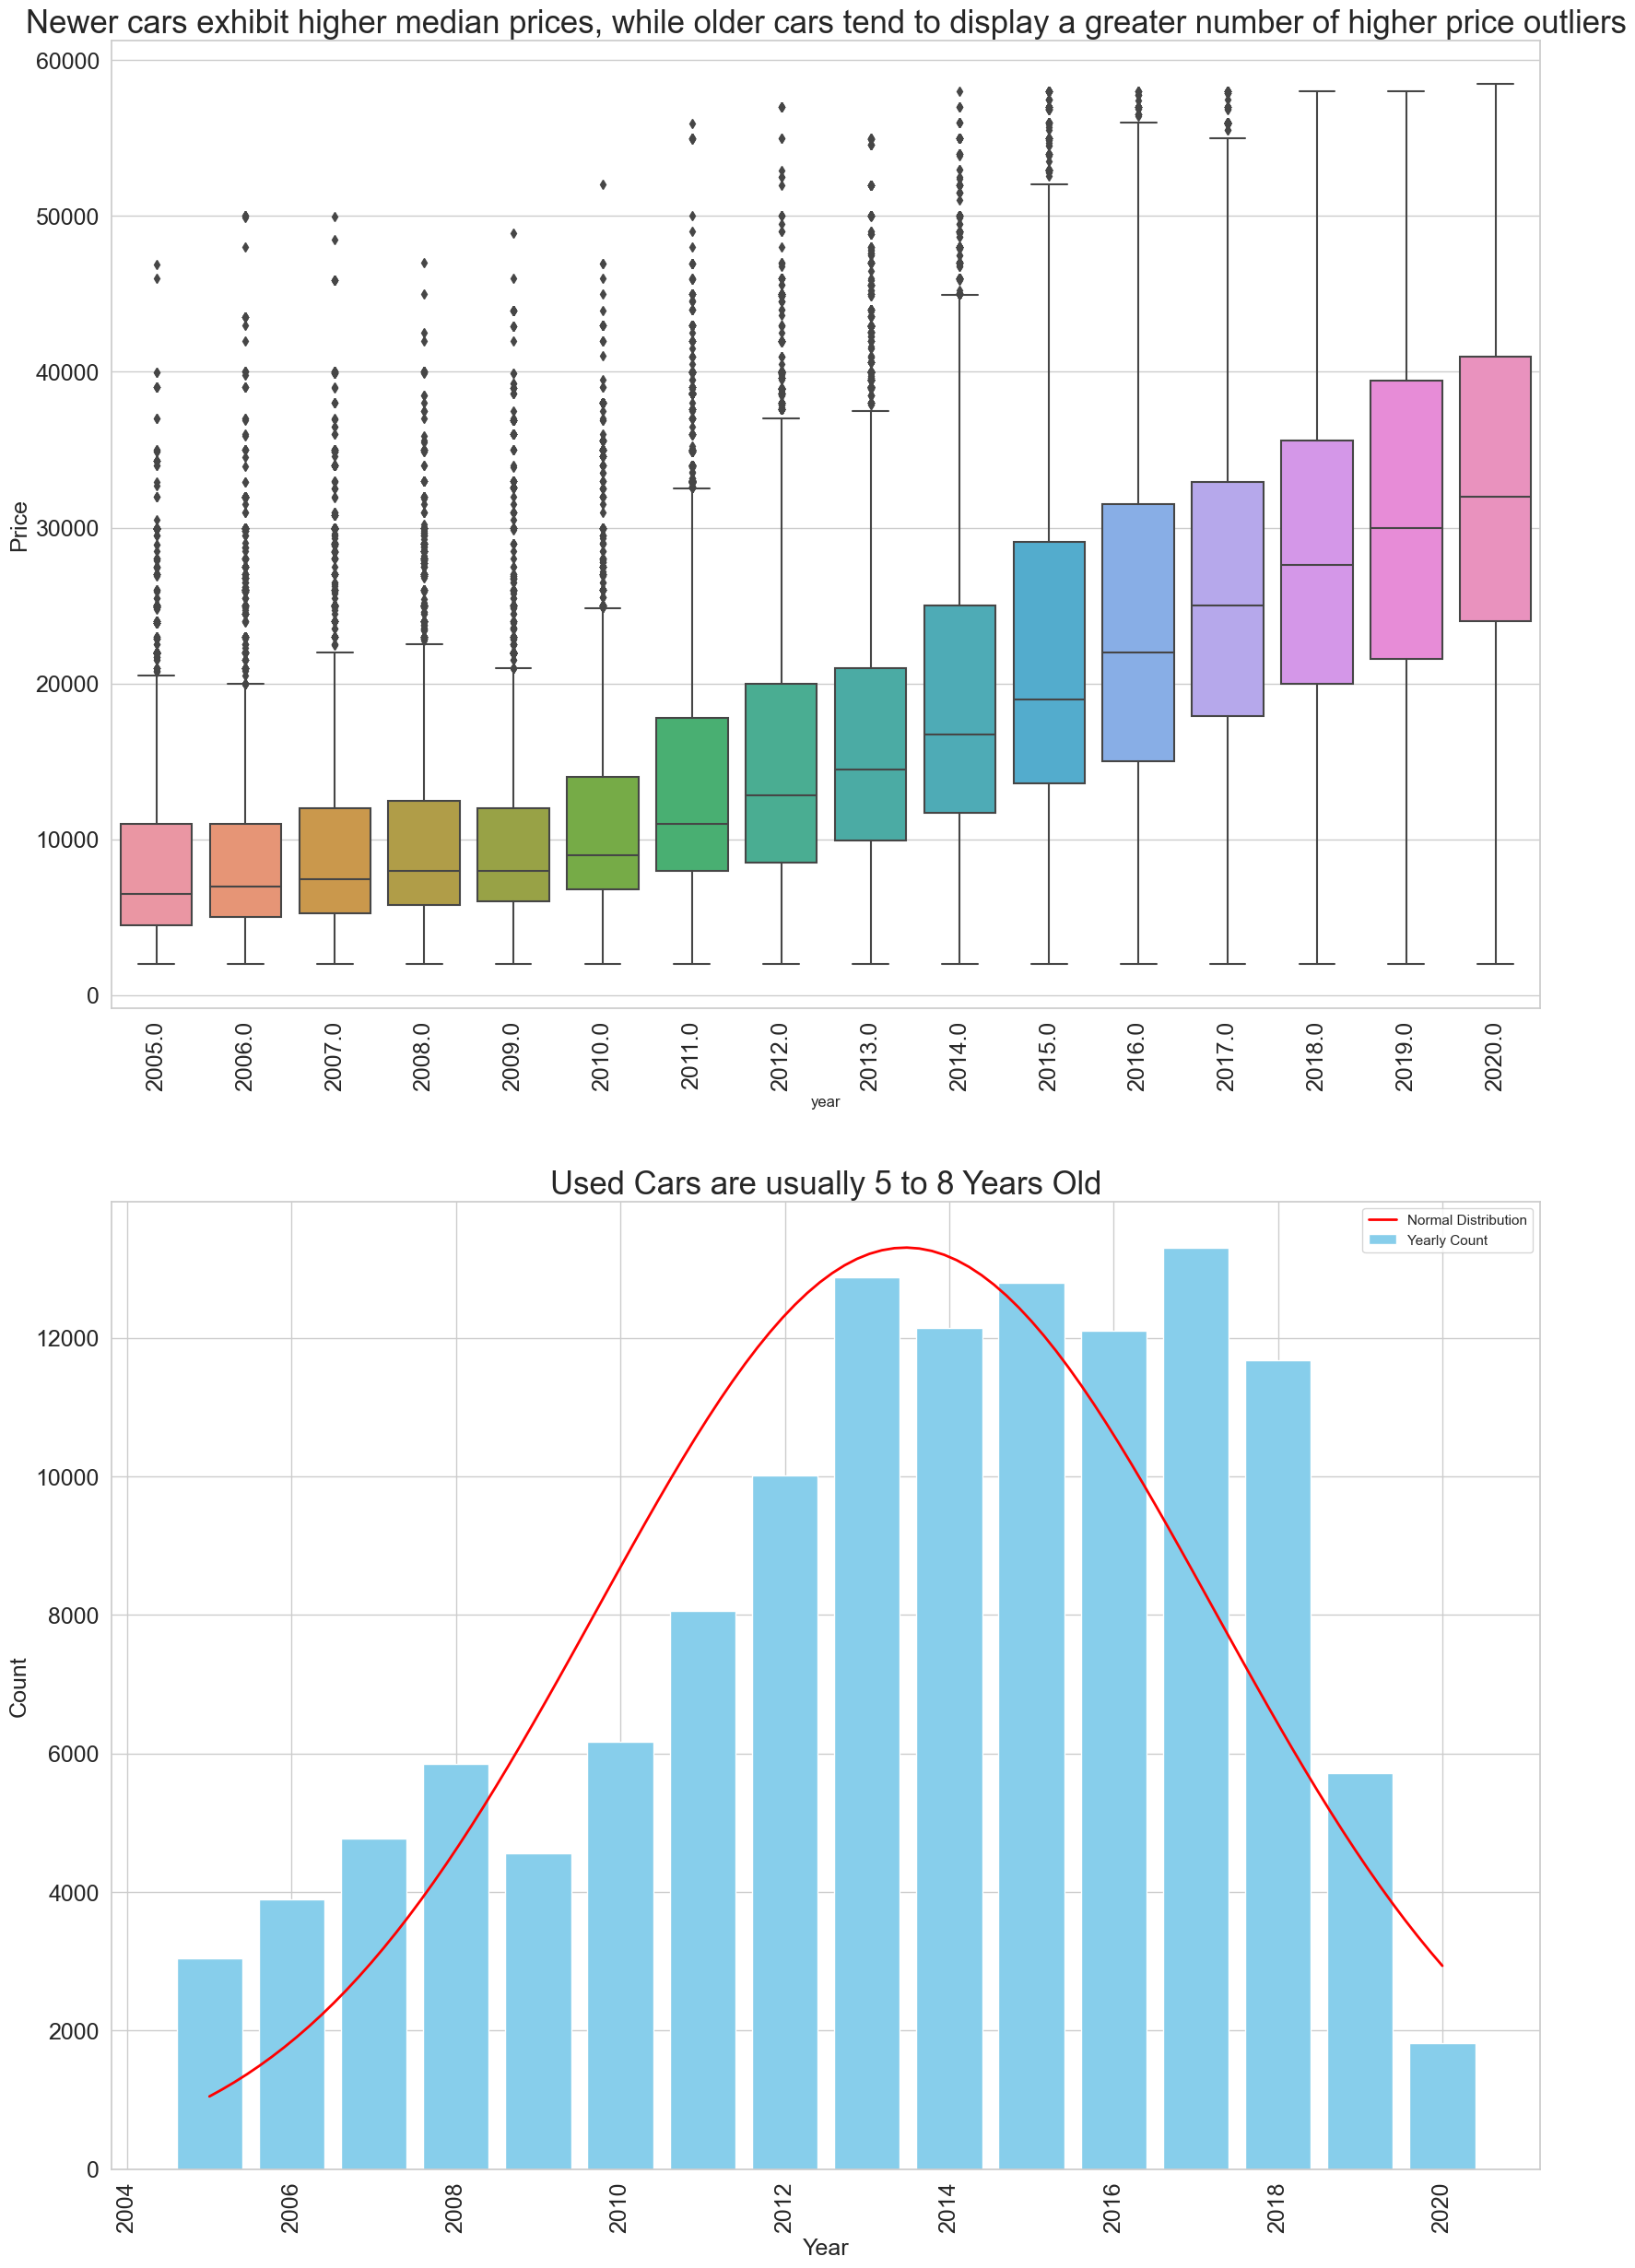

In [193]:
# create a combined plot with median car price snd counts by year overlayed by normal curve

fig, ax = plt.subplots(2, 1, figsize=(20, 30))

# Box plot on the first subplot, sorted by median prices of year
sns.boxplot(x='year', y='price', data=cars_cleaned, ax=ax[0], order=sorted_year)
ax[0].set_title('Newer cars exhibit higher median prices, while older cars tend to display a greater number of higher price outliers', fontsize=25)
ax[0].set_ylabel('Price', fontsize=18)
ax[0].tick_params(axis='x', rotation=90, labelsize=18)  # Rotate and increase x-axis labels size
ax[0].tick_params(axis='y', labelsize=18)  # Increase y-axis labels size

# Bar plot on the second subplot, showing counts of each year
ax[1].bar(sorted_year, year_counts.values, color='skyblue', label='Yearly Count')
ax[1].plot(x, normal_distribution_scaled, color='red', linewidth=2, label='Normal Distribution')  # Plot the normal curve
ax[1].set_title('Used Cars are usually 5 to 8 Years Old', fontsize=25)
ax[1].set_xlabel('Year', fontsize=18)
ax[1].set_ylabel('Count', fontsize=18)
ax[1].tick_params(axis='x', rotation=90, labelsize=18)  # Rotate and increase x-axis labels size
ax[1].tick_params(axis='y', labelsize=18)  # Increase y-axis labels size
ax[1].legend()  # Show legend to distinguish the bar chart and the normal curve

# Show plot
plt.show()

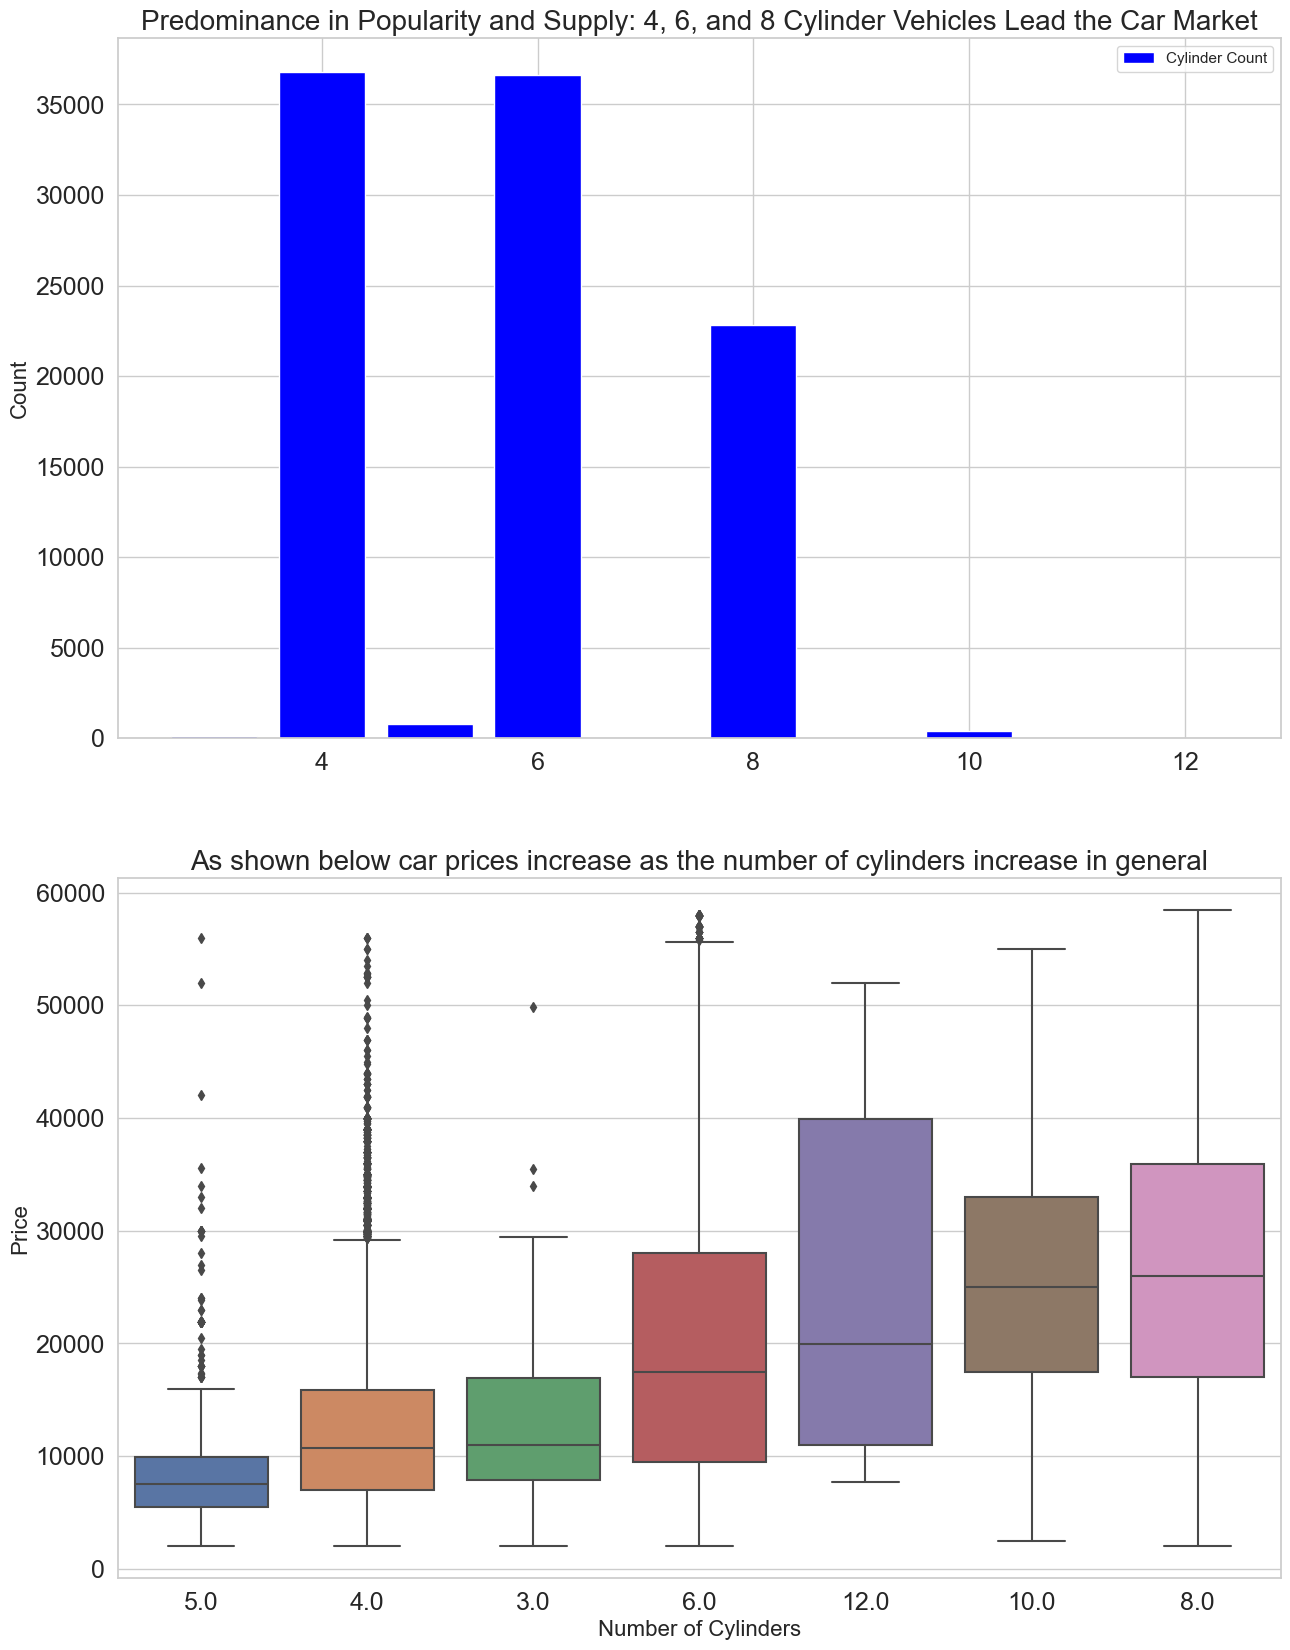

In [192]:
# plot counts and median prices by the number of cylinders

fig, ax = plt.subplots(2, 1, figsize=(15, 20))  # Adjust size as needed

# Calculate the median prices and counts sorted by cylinder count
median_prices_cylinder = cars_cleaned.groupby('cylinders_numeric')['price'].median().sort_values()
sorted_cylinder = median_prices_cylinder.index.tolist()
cylinder_counts = cars_cleaned['cylinders_numeric'].value_counts().reindex(sorted_cylinder)

# Bar plot on the first subplot, showing counts of cars by cylinder count
ax[0].bar(sorted_cylinder, cylinder_counts.values, color='blue', label='Cylinder Count')
ax[0].set_title('Predominance in Popularity and Supply: 4, 6, and 8 Cylinder Vehicles Lead the Car Market', fontsize=20)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(axis='x', labelsize=18)  # Adjust x-axis labels size
ax[0].tick_params(axis='y', labelsize=18)  # Adjust y-axis labels size
ax[0].legend()  # Show legend

# Box plot on the second subplot, showing prices by cylinder count
sns.boxplot(x='cylinders_numeric', y='price', data=cars_cleaned, ax=ax[1], order=sorted_cylinder)
ax[1].set_title('As shown below car prices increase as the number of cylinders increase in general', fontsize=20)
ax[1].set_xlabel('Number of Cylinders', fontsize=16)
ax[1].set_ylabel('Price', fontsize=16)
ax[1].tick_params(axis='x', labelsize=18) 
ax[1].tick_params(axis='y', labelsize=18)  


plt.show()


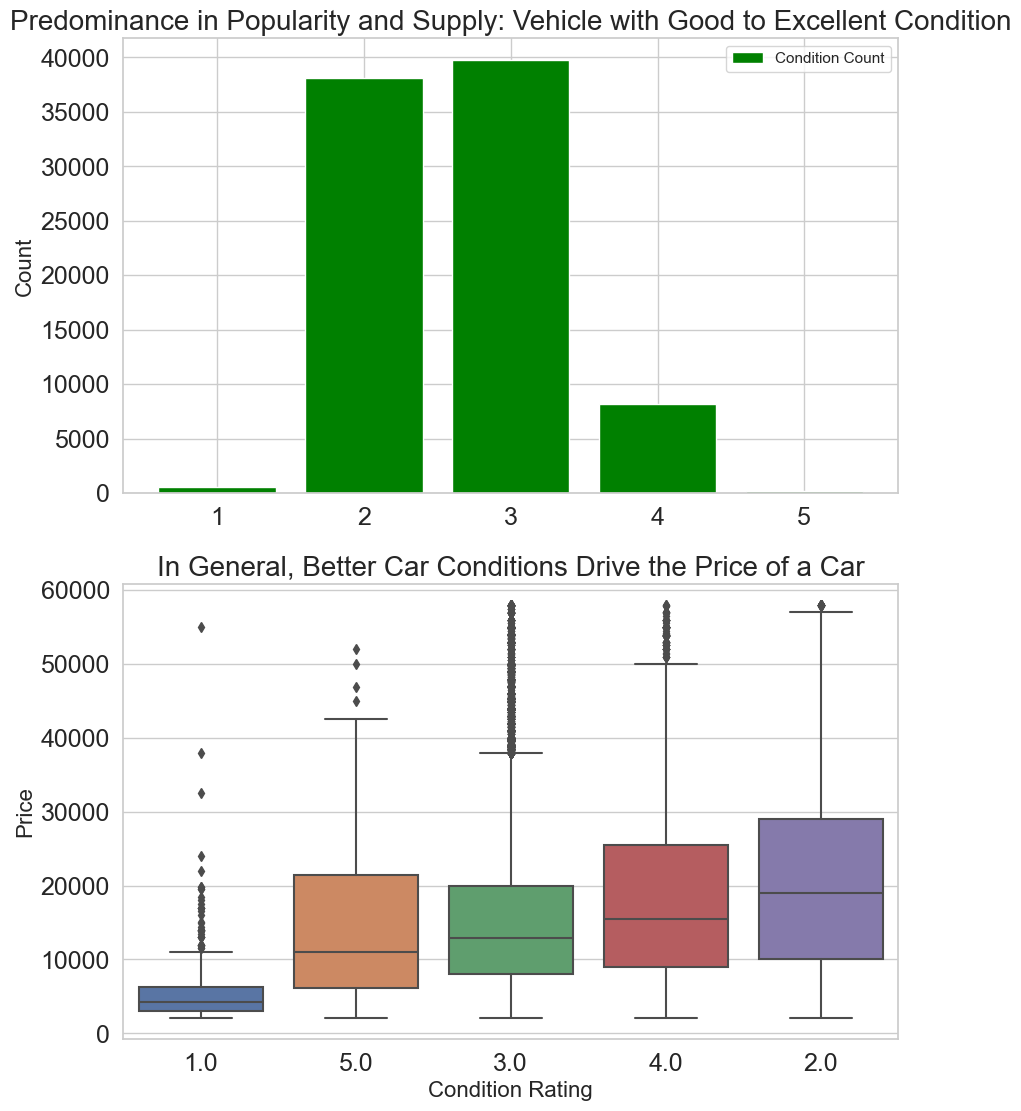

In [205]:
# plot condition_numeric counts with median price.


# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 13))

# Bar plot on the first subplot, showing counts of cars by condition numeric
median_prices_condition = cars_cleaned.groupby('condition_numeric')['price'].median().sort_values()
sorted_condition = median_prices_condition.index.tolist()
condition_counts = cars_cleaned['condition_numeric'].value_counts().reindex(sorted_condition)

ax[0].bar(sorted_condition, condition_counts.values, color='Green', label='Condition Count')
ax[0].set_title('Predominance in Popularity and Supply: Vehicle with Good to Excellent Condition', fontsize=20)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(axis='x', labelsize=18)  # Adjust x-axis labels size
ax[0].tick_params(axis='y', labelsize=18)  # Adjust y-axis labels size
ax[0].legend()  # Show legend

# Box plot on the second subplot, showing prices by condition numeric
sns.boxplot(x='condition_numeric', y='price', data=cars_cleaned, ax=ax[1], order=sorted_condition)
ax[1].set_title('In General, Better Car Conditions Drive the Price of a Car', fontsize=20)
ax[1].set_xlabel('Condition Rating', fontsize=16)
ax[1].set_ylabel('Price', fontsize=16)
ax[1].tick_params(axis='x', labelsize=18)  # Adjust x-axis labels size
ax[1].tick_params(axis='y', labelsize=18)  # Adjust y-axis labels size

# Show plot
plt.show()

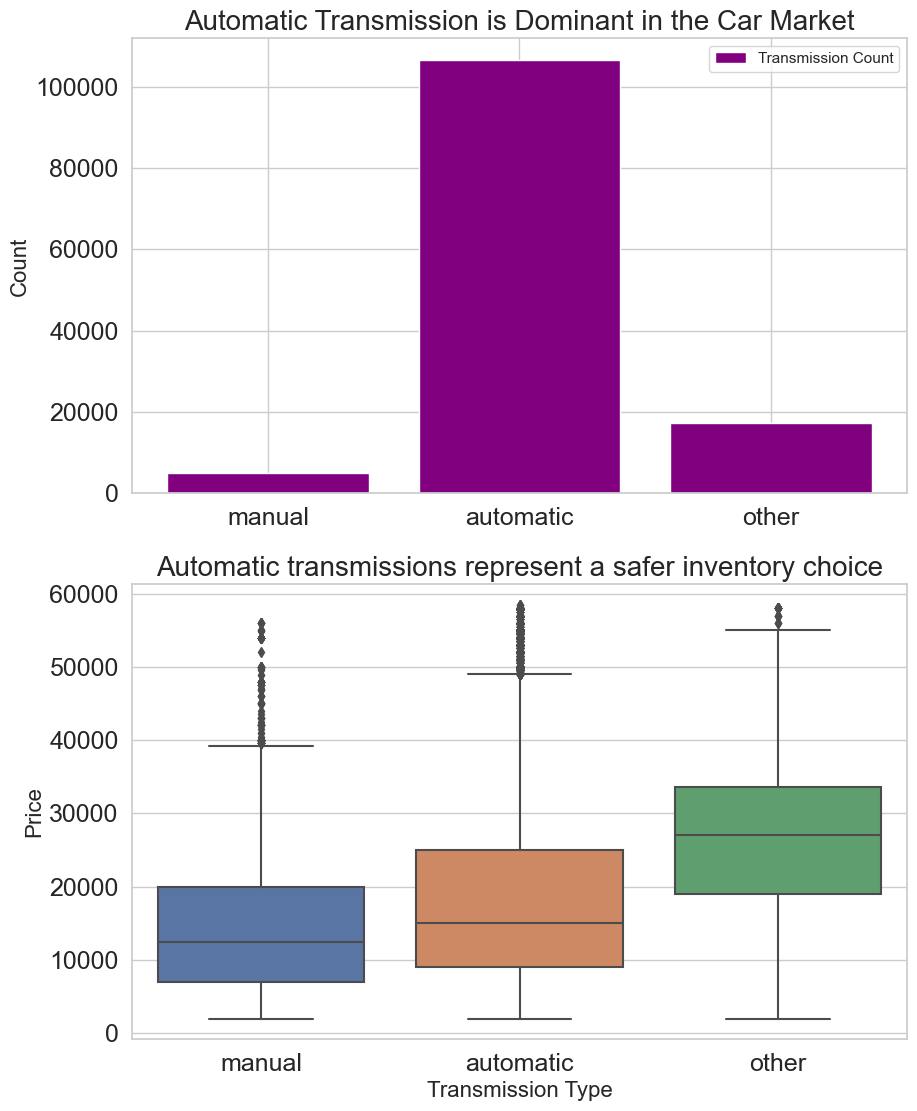

In [206]:
# plot a combined chart:  count and median price by transmission type

fig, ax = plt.subplots(2, 1, figsize=(10, 13))  

# Calculate the median prices and counts sorted by transmission type
median_prices_transmission = cars_cleaned.groupby('transmission')['price'].median().sort_values()
sorted_transmission = median_prices_transmission.index.tolist()
transmission_counts = cars_cleaned['transmission'].value_counts().reindex(sorted_transmission)

# Bar plot on the first subplot, showing counts of cars by transmission type
ax[0].bar(sorted_transmission, transmission_counts.values, color='purple', label='Transmission Count')
ax[0].set_title('Automatic Transmission is Dominant in the Car Market', fontsize=20)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(axis='x', labelsize=18)  # Adjust x-axis labels size
ax[0].tick_params(axis='y', labelsize=18)  # Adjust y-axis labels size
ax[0].legend()  # Show legend

# Box plot on the second subplot, showing prices by transmission type
sns.boxplot(x='transmission', y='price', data=cars_cleaned, ax=ax[1], order=sorted_transmission)
ax[1].set_title('Automatic transmissions represent a safer inventory choice', fontsize=20)
ax[1].set_xlabel('Transmission Type', fontsize=16)
ax[1].set_ylabel('Price', fontsize=16)
ax[1].tick_params(axis='x', labelsize=18)  # Adjust x-axis labels size
ax[1].tick_params(axis='y', labelsize=18)  # Adjust y-axis labels size

# Show plot
plt.show()

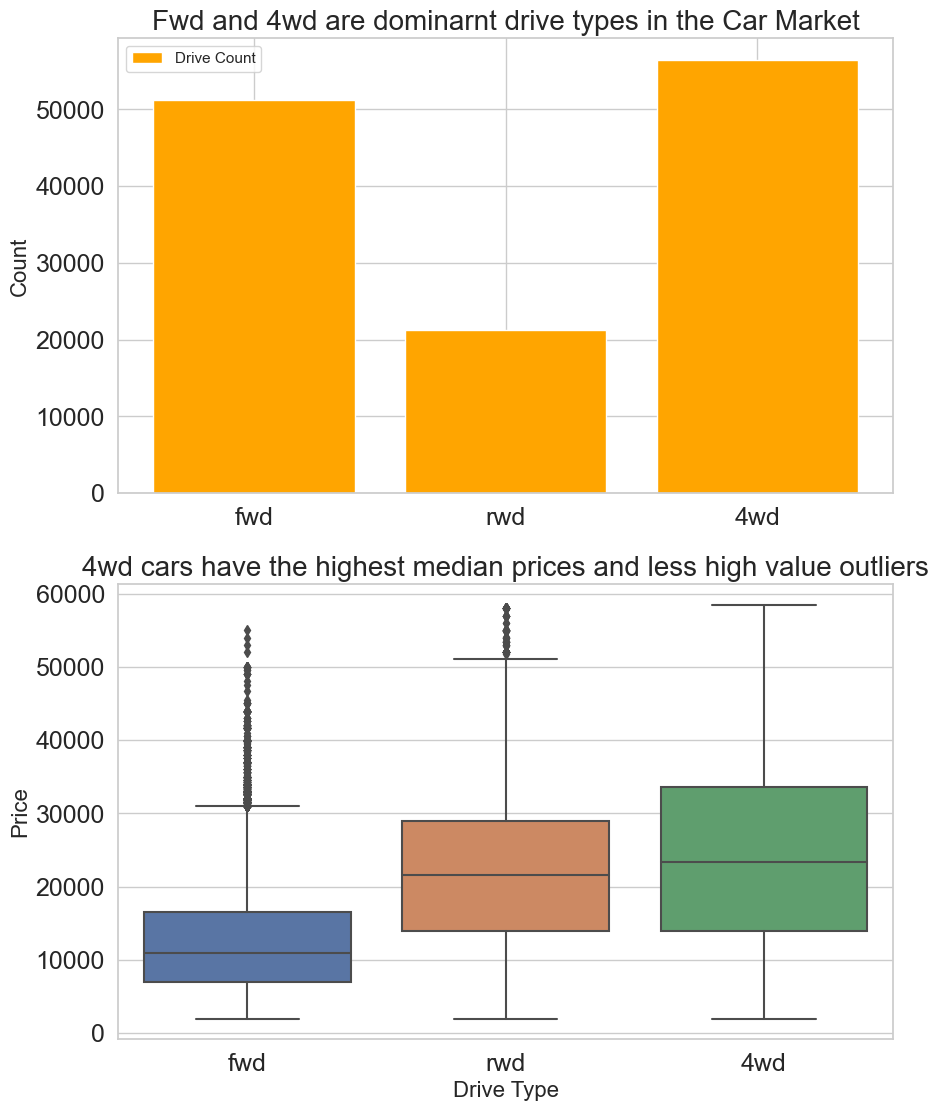

In [208]:
## plot a combined chart: count and median price by dirve type

# Calculate median prices for sorting box plot
fig, ax = plt.subplots(2, 1, figsize=(10, 13))

# Calculate the median prices and counts sorted by drive type
median_prices_drive = cars_cleaned.groupby('drive')['price'].median().sort_values()
sorted_drive = median_prices_drive.index.tolist()
drive_counts = cars_cleaned['drive'].value_counts().reindex(sorted_drive)

# Bar plot on the first subplot, showing counts of cars by drive type
ax[0].bar(sorted_drive, drive_counts.values, color='orange', label='Drive Count')
ax[0].set_title('Fwd and 4wd are dominarnt drive types in the Car Market', fontsize=20)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(axis='x', labelsize=18)  # Adjust x-axis labels size
ax[0].tick_params(axis='y', labelsize=18)  # Adjust y-axis labels size
ax[0].legend()  # Show legend

# Box plot on the second subplot, showing prices by drive type
sns.boxplot(x='drive', y='price', data=cars_cleaned, ax=ax[1], order=sorted_drive)
ax[1].set_title('4wd cars have the highest median prices and less high value outliers', fontsize=20)
ax[1].set_xlabel('Drive Type', fontsize=16)
ax[1].set_ylabel('Price', fontsize=16)
ax[1].tick_params(axis='x', labelsize=18)  # Adjust x-axis labels size
ax[1].tick_params(axis='y', labelsize=18)  # Adjust y-axis labels size

# Show plot
plt.show()

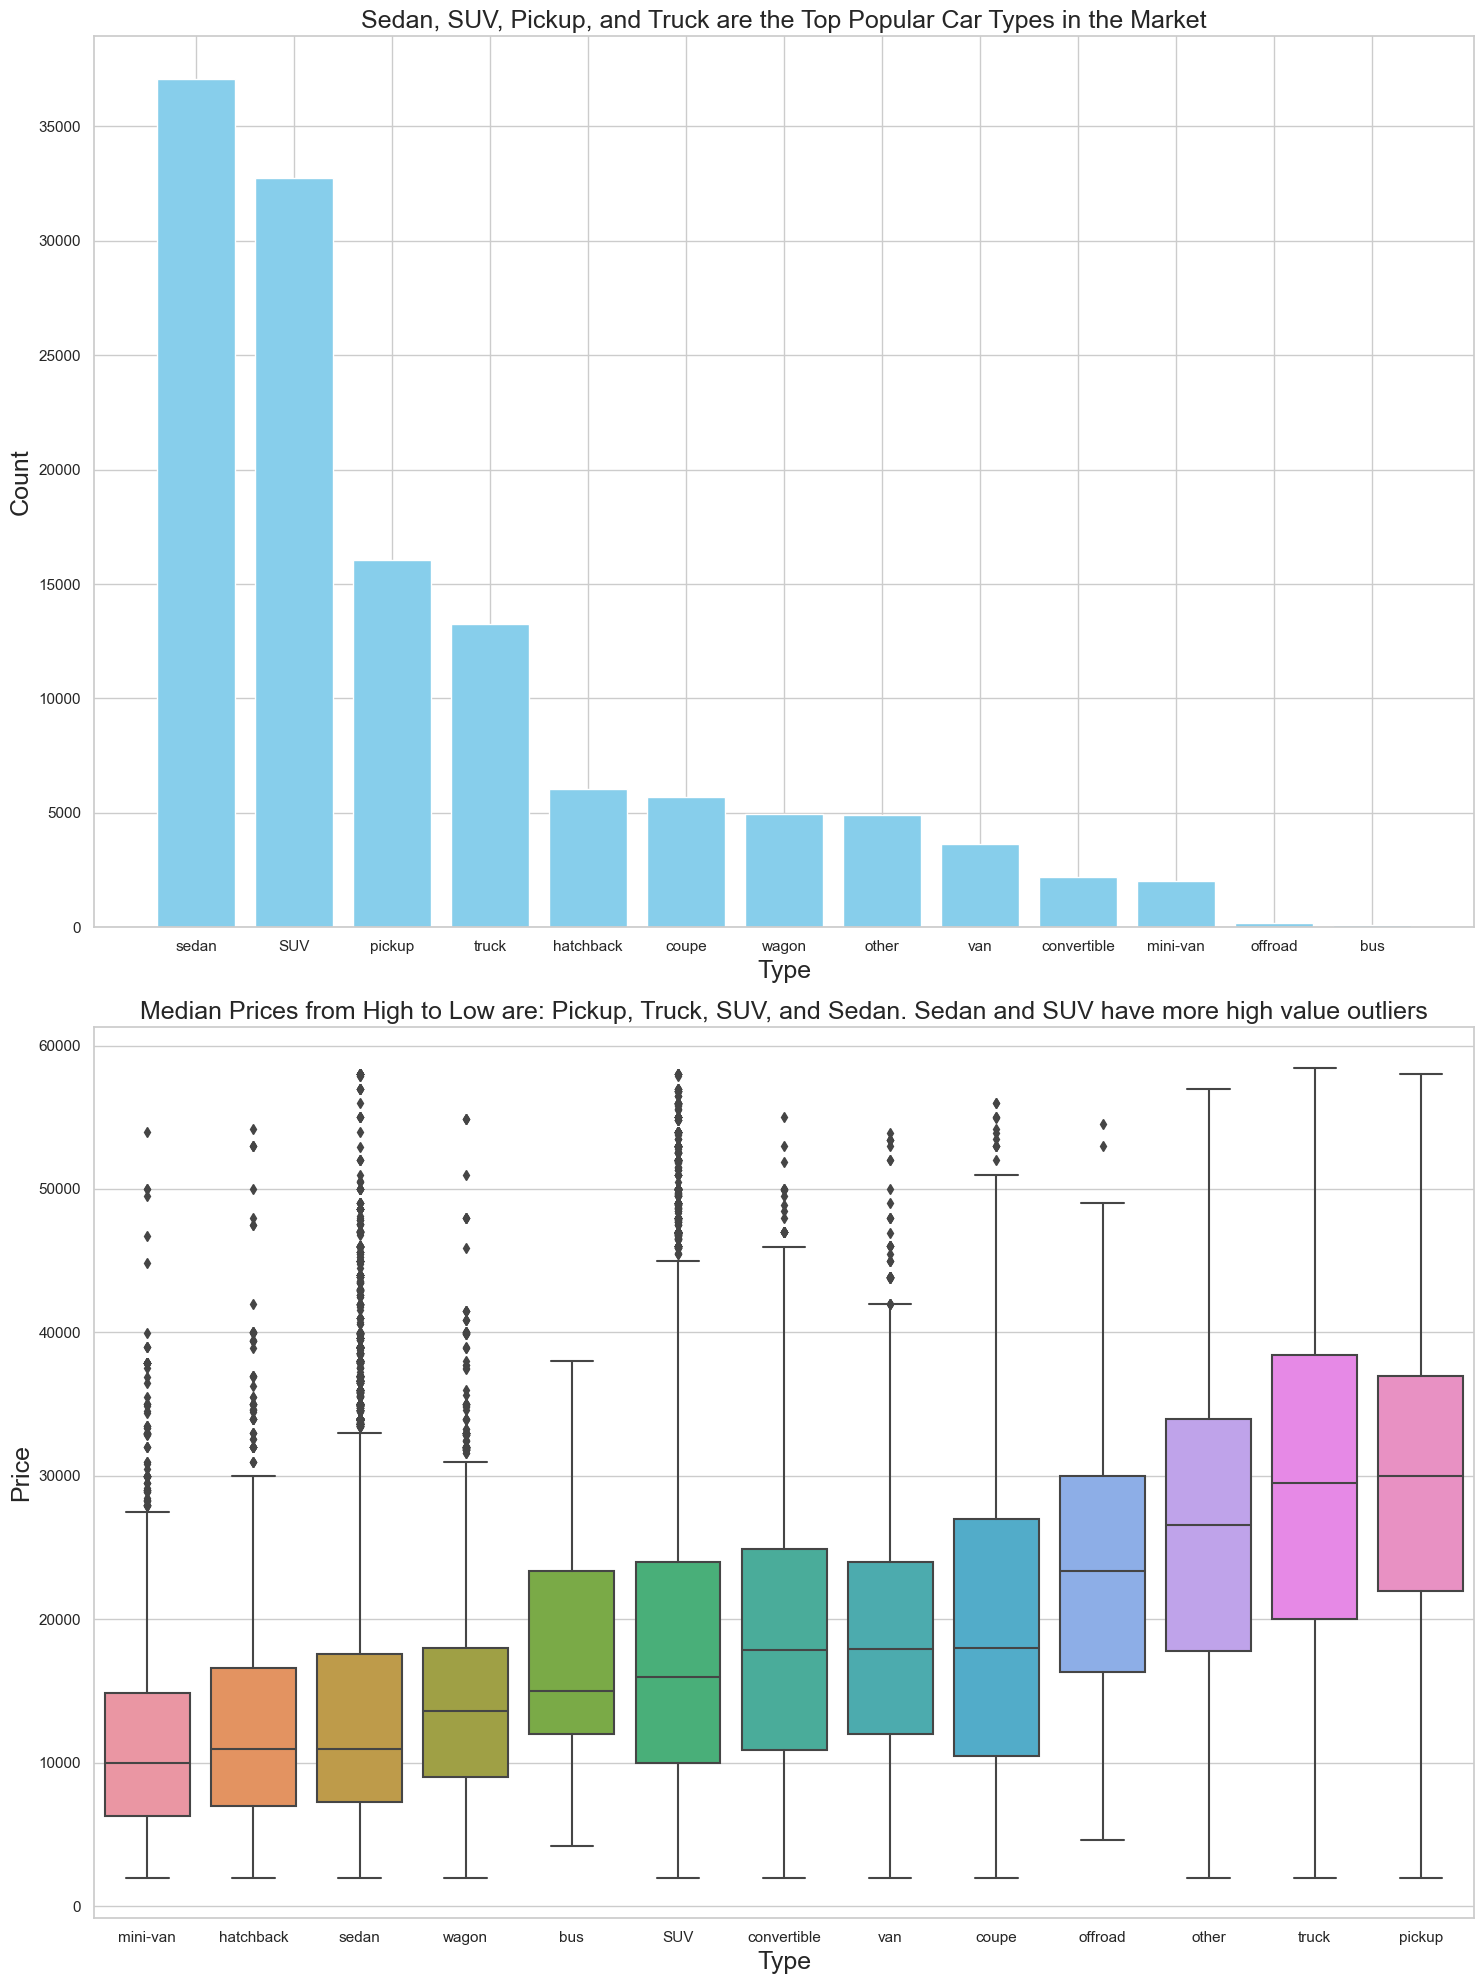

In [219]:
# plot a combined chart:  count and median price by car type
median_prices_type = cars_cleaned.groupby('type')['price'].median().sort_values()
sorted_types = median_prices_type.index.tolist()

fig, ax = plt.subplots(2, 1, figsize=(15, 20))  # Adjust size as needed

# Bar plot on the first subplot, showing counts of each type, sorted by count
# Calculate counts for each type and then sort by count in descending order
type_counts = cars_cleaned['type'].value_counts()
sorted_type_counts = type_counts.reindex(sorted_types).fillna(0).sort_values(ascending=False)
ax[0].bar(sorted_type_counts.index, sorted_type_counts.values, color='skyblue')
ax[0].set_title('Sedan, SUV, Pickup, and Truck are the Top Popular Car Types in the Market', fontsize=18)
ax[0].set_xlabel('Type', fontsize=18)
ax[0].set_ylabel('Count', fontsize=18)

# Box plot on the second subplot, sorted by median prices of type
sns.boxplot(x='type', y='price', data=cars_cleaned, ax=ax[1], order=sorted_types)
ax[1].set_title('Median Prices from High to Low are: Pickup, Truck, SUV, and Sedan. Sedan and SUV have more high value outliers', fontsize=18)
ax[1].set_xlabel('Type', fontsize=18)
ax[1].set_ylabel('Price', fontsize=18)

# Ensure layout does not overlap and everything is clearly visible
plt.tight_layout()
plt.show()

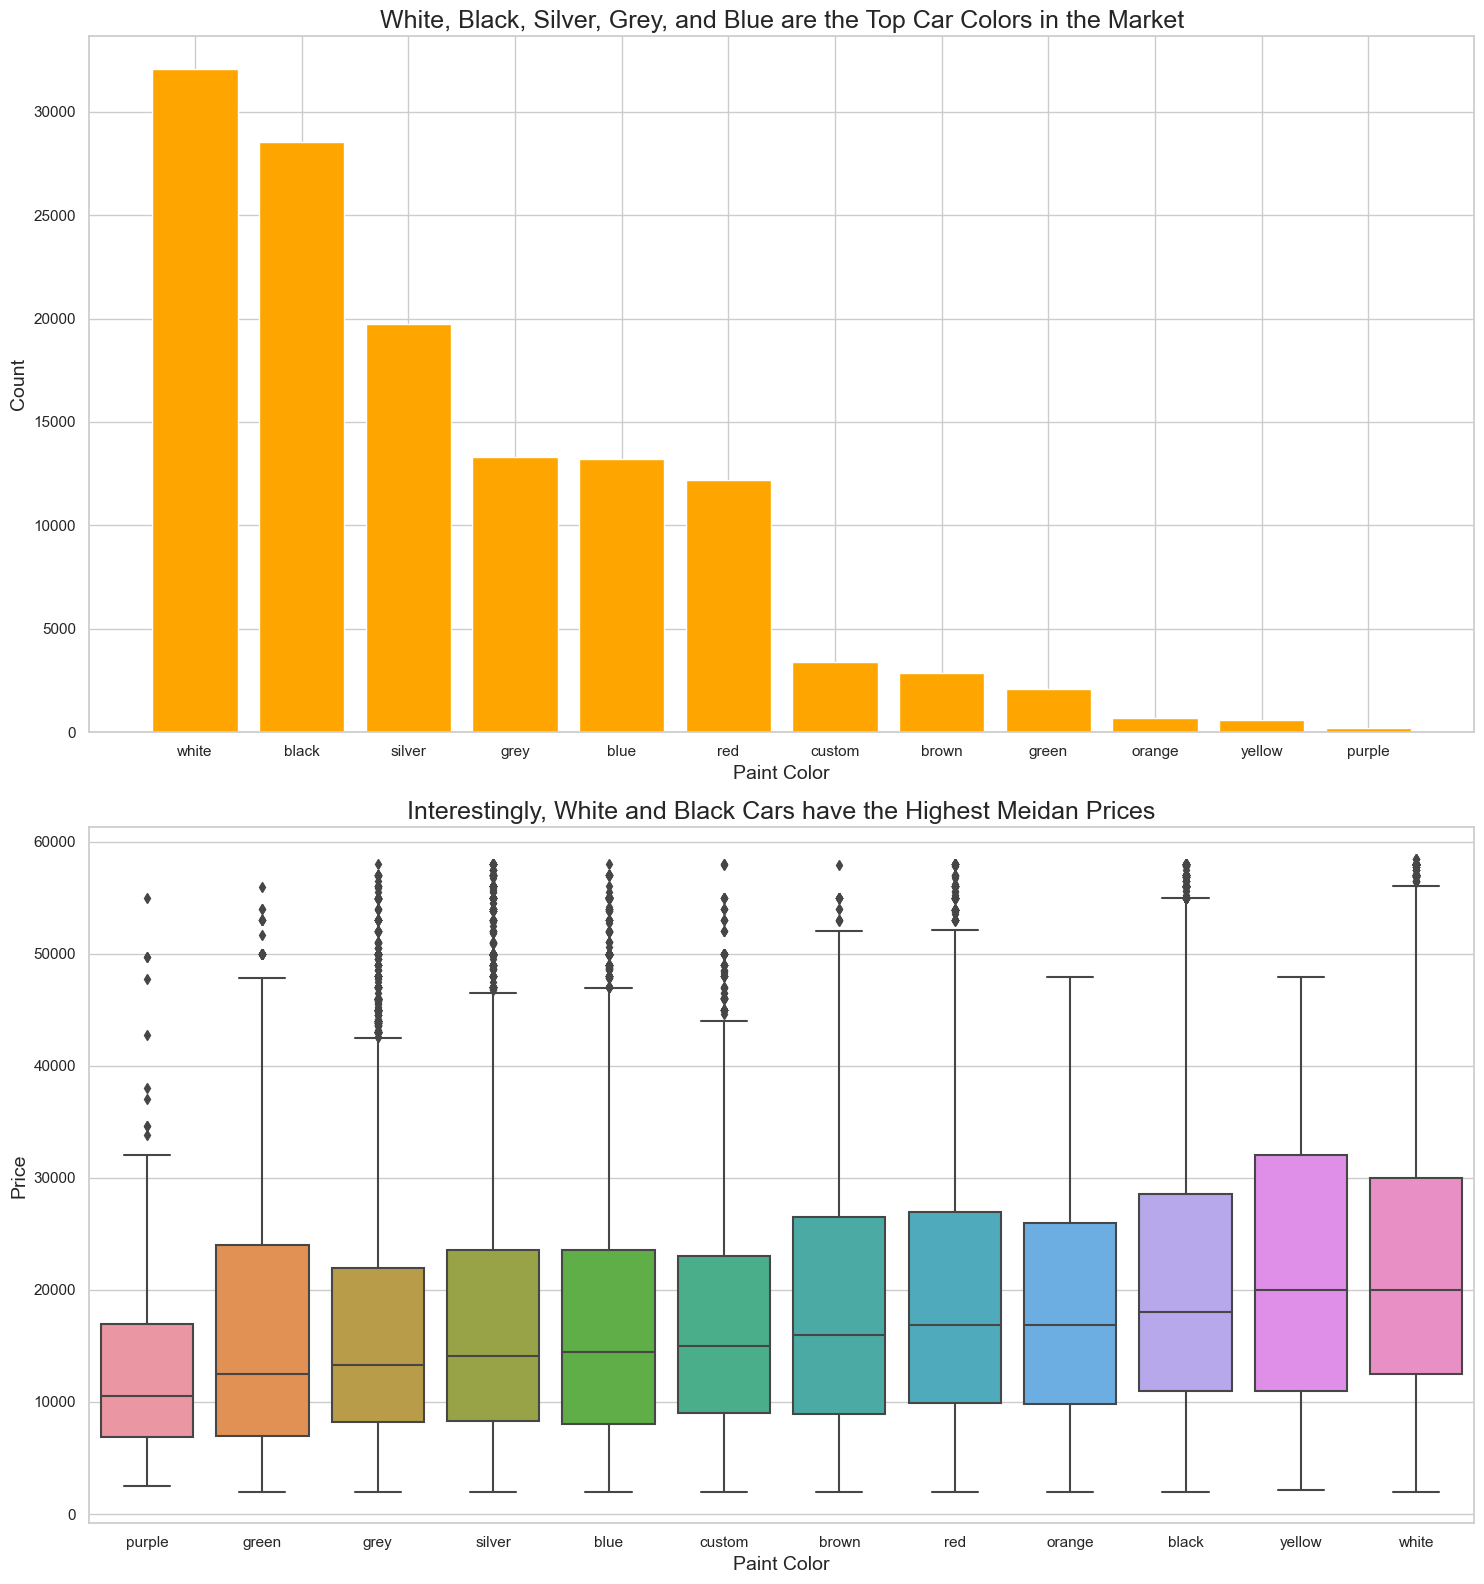

In [213]:
# plot a combined chart:  count and median price by paint color

fig, ax = plt.subplots(2, 1, figsize=(15, 16))  

# Calculate the median prices and counts sorted by paint color
median_prices_color = cars_cleaned.groupby('paint_color')['price'].median().sort_values()
sorted_colors = median_prices_color.index.tolist()

# Calculate counts for each paint color and then sort by the sorted_colors
color_counts = cars_cleaned['paint_color'].value_counts().reindex(sorted_colors).fillna(0).sort_values(ascending=False)

# Bar plot on the first subplot, showing counts of each paint color, sorted by count
ax[0].bar(color_counts.index, color_counts.values, color='orange')
ax[0].set_title('White, Black, Silver, Grey, and Blue are the Top Car Colors in the Market', fontsize=18)
ax[0].set_xlabel('Paint Color', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

# Box plot on the second subplot, showing prices by paint color
sns.boxplot(x='paint_color', y='price', data=cars_cleaned, ax=ax[1], order=sorted_colors)
ax[1].set_title('Interestingly, White and Black Cars have the Highest Meidan Prices', fontsize=18)
ax[1].set_xlabel('Paint Color', fontsize=14)
ax[1].set_ylabel('Price', fontsize=14)

# Ensure layout does not overlap and everything is clearly visible
plt.tight_layout()
plt.show()

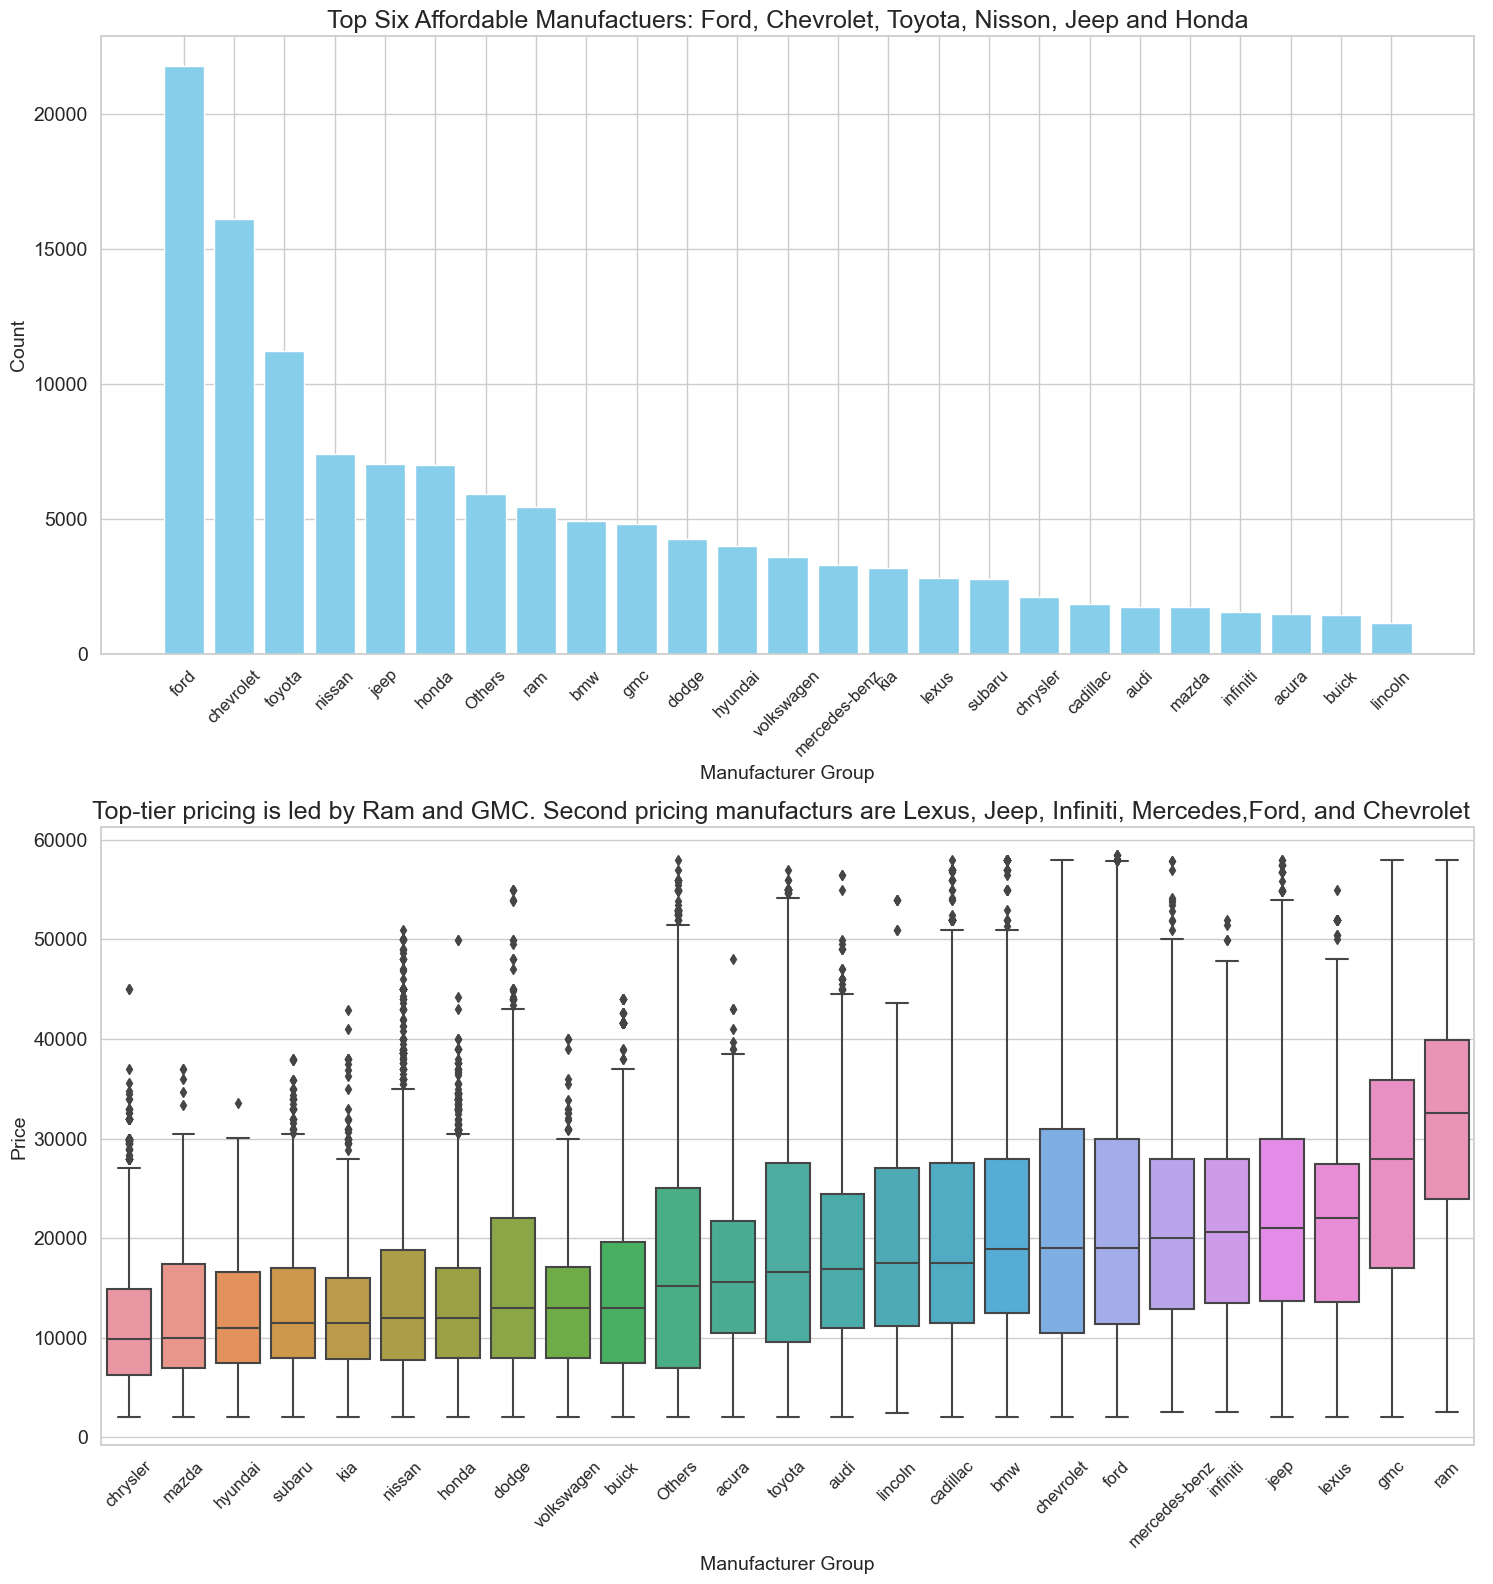

In [225]:
# plot a combined chart:  count and median price by manufacturer group
fig, ax = plt.subplots(2, 1, figsize=(15, 16))

# Calculate the median prices and counts sorted by manufacturer group
median_prices_manufacturer = cars_cleaned.groupby('manufacturer_grouped')['price'].median().sort_values()
sorted_manufacturers = median_prices_manufacturer.index.tolist()

# Calculate counts for each manufacturer group and then sort by the sorted_manufacturers
manufacturer_counts = cars_cleaned['manufacturer_grouped'].value_counts().reindex(sorted_manufacturers).fillna(0).sort_values(ascending=False)

# Bar plot on the first subplot, showing counts of each manufacturer group, sorted by count
ax[0].bar(manufacturer_counts.index, manufacturer_counts.values, color='skyblue')
ax[0].set_title('Top Six Affordable Manufactuers: Ford, Chevrolet, Toyota, Nisson, Jeep and Honda', fontsize=18)
ax[0].set_xlabel('Manufacturer Group', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(axis='x', labelsize=12, rotation=45)  # Rotate x-axis labels for better visibility
ax[0].tick_params(axis='y', labelsize=14)

# Box plot on the second subplot, showing prices by manufacturer group
sns.boxplot(x='manufacturer_grouped', y='price', data=cars_cleaned, ax=ax[1], order=sorted_manufacturers)
ax[1].set_title('Top-tier pricing is led by Ram and GMC. Second pricing manufacturs are Lexus, Jeep, Infiniti, Mercedes,Ford, and Chevrolet  ', fontsize=18)
ax[1].set_xlabel('Manufacturer Group', fontsize=14)
ax[1].set_ylabel('Price', fontsize=14)
ax[1].tick_params(axis='x', labelsize=12, rotation=45)  # Rotate x-axis labels for better visibility
ax[1].tick_params(axis='y', labelsize=14)

# Ensure layout does not overlap and everything is clearly visible
plt.tight_layout()
plt.show()

In [226]:
cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128832 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 128832 non-null  int64  
 1   year                  128832 non-null  float64
 2   fuel                  128832 non-null  object 
 3   odometer              128832 non-null  float64
 4   transmission          128832 non-null  object 
 5   drive                 128832 non-null  object 
 6   type                  128832 non-null  object 
 7   paint_color           128832 non-null  object 
 8   manufacturer_grouped  128832 non-null  object 
 9   cylinders_numeric     97664 non-null   float64
 10  condition_numeric     86786 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 11.8+ MB


### 2.4: Exploring the correlationhsip among numerical Variables.

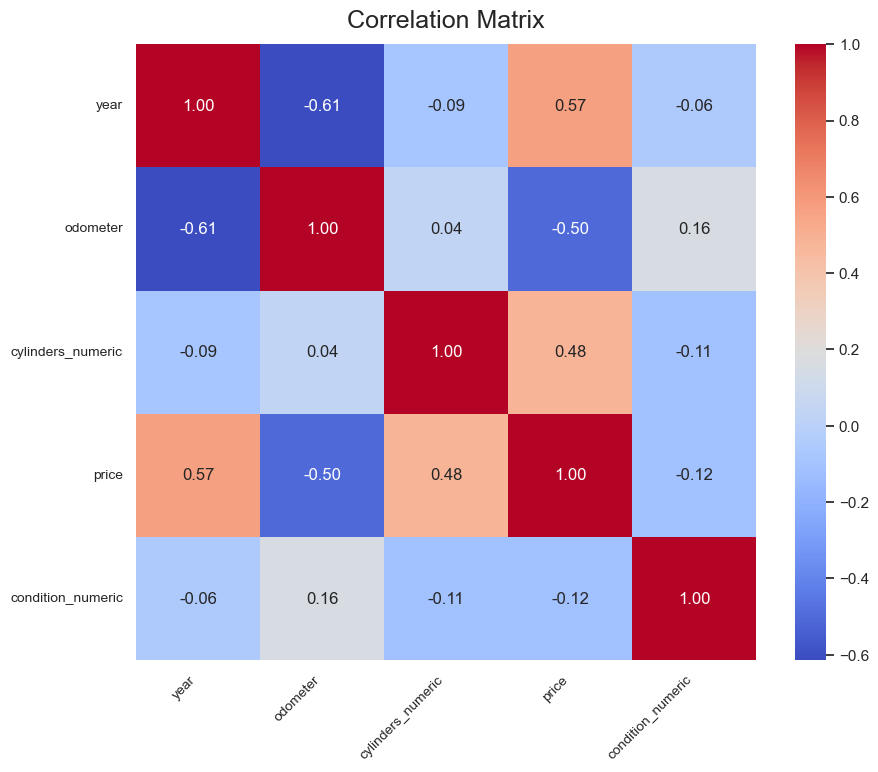

In [228]:
# Generate a heatmap of correlations with labels
corr_matrix = cars_cleaned[['year', 'odometer', 'cylinders_numeric', 'price', 'condition_numeric']].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust the x-axis labels
plt.yticks(rotation=0, fontsize=10)  # Adjust the y-axis labels
plt.show()

### Additional Data Preparation prior to modelling

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

 Actions: 
 
 1) Split the cleaned data set into train and test datasets
 2) Compute the median values for cylinder and car condition variables. 
 3) impute missing values for cylinder and car condition using the median values. 
 4) log transfom odometer for better central tendency
 5) Checking Missing values for train and test datasets. 


In [ ]:
cars_cleaned.columns

In [230]:
cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128832 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 128832 non-null  int64  
 1   year                  128832 non-null  float64
 2   fuel                  128832 non-null  object 
 3   odometer              128832 non-null  float64
 4   transmission          128832 non-null  object 
 5   drive                 128832 non-null  object 
 6   type                  128832 non-null  object 
 7   paint_color           128832 non-null  object 
 8   manufacturer_grouped  128832 non-null  object 
 9   cylinders_numeric     97664 non-null   float64
 10  condition_numeric     86786 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 11.8+ MB


In [231]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn import set_config, linear_model
set_config(display="diagram")


In [239]:
# split dataset into train - 80%, test - 20%
X = cars_cleaned.drop(columns = ['price'])
y = cars_cleaned['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)
# X_val, X_test, y_val, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42, shuffle = True)


In [233]:
Ready to impurte the missing values of condition_numeric and _clylinders_numeric
condition_median = X_train['condition_numeric'].median()
print(condition_median)

3.0


In [234]:
cylinder_median = X_train['cylinders_numeric'].median()
print(cylinder_median)

6.0


In [261]:
X_train['cylinders_numeric'].fillna(cylinder_median, inplace=True)

In [260]:
X_test['cylinders_numeric'].fillna(cylinder_median, inplace=True)

In [262]:
X_train['condition_numeric'].fillna(condition_median, inplace=True)
X_test['condition_numeric'].fillna(condition_median, inplace=True)

In [264]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103065 entries, 63781 to 404008
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  103065 non-null  float64
 1   fuel                  103065 non-null  object 
 2   odometer              103065 non-null  float64
 3   transmission          103065 non-null  object 
 4   drive                 103065 non-null  object 
 5   type                  103065 non-null  object 
 6   paint_color           103065 non-null  object 
 7   manufacturer_grouped  103065 non-null  object 
 8   cylinders_numeric     103065 non-null  float64
 9   condition_numeric     103065 non-null  float64
 10  log_price             103065 non-null  float64
 11  log_odometer          103065 non-null  float64
dtypes: float64(6), object(6)
memory usage: 10.2+ MB


In [265]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25767 entries, 351737 to 268428
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  25767 non-null  float64
 1   fuel                  25767 non-null  object 
 2   odometer              25767 non-null  float64
 3   transmission          25767 non-null  object 
 4   drive                 25767 non-null  object 
 5   type                  25767 non-null  object 
 6   paint_color           25767 non-null  object 
 7   manufacturer_grouped  25767 non-null  object 
 8   cylinders_numeric     25767 non-null  float64
 9   condition_numeric     25767 non-null  float64
 10  log_price             25767 non-null  float64
 11  log_odometer          25767 non-null  float64
dtypes: float64(6), object(6)
memory usage: 2.6+ MB


In [263]:
print(X_train.shape)
print(X_test.shape)

(103065, 12)
(25767, 12)


In [266]:
# Apply log transformation using np.log1p which calculates log(1 + x) to handle zero values safely
X_train['log_odometer'] = np.log1p(X_train['odometer'])
X_test['log_odometer'] = np.log1p(X_test['odometer'])

In [267]:
# Optionally, check the transformation
print(X_train[['odometer', 'log_odometer']].head())
print(X_test[['odometer', 'log_odometer']].head())

        odometer  log_odometer
63781   163436.0     12.004183
223181   23488.0     10.064288
105694   89796.0     11.405307
76499   161000.0     11.989166
314429  172582.0     12.058634
        odometer  log_odometer
351737   20581.0      9.932172
380522   57500.0     10.959558
181039  111511.0     11.621887
74057    33078.0     10.406654
294238  128024.0     11.759981


In [268]:
negative_values_train = (X_train['log_odometer'] < 0).sum()
negative_values_test = (X_test['log_odometer'] < 0).sum()

# Check for any missing values in the log-transformed 'odometer' data
missing_values_train = X_train['log_odometer'].isnull().sum()
missing_values_test = X_test['log_odometer'].isnull().sum()

# Print the results
print(f"Negative values in training data: {negative_values_train}")
print(f"Negative values in testing data: {negative_values_test}")
print(f"Missing values in training data: {missing_values_train}")
print(f"Missing values in testing data: {missing_values_test}")

Negative values in training data: 0
Negative values in testing data: 0
Missing values in training data: 0
Missing values in testing data: 0


In [269]:
X_train.columns


Index(['year', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'manufacturer_grouped', 'cylinders_numeric',
       'condition_numeric', 'log_price', 'log_odometer'],
      dtype='object')

In [270]:
X_test.columns

Index(['year', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'manufacturer_grouped', 'cylinders_numeric',
       'condition_numeric', 'log_price', 'log_odometer'],
      dtype='object')

In [271]:
# log transofrm the target variable.

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

### Modeling/Evaluation

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [255]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

set_config(display="diagram")

import warnings
warnings.filterwarnings('ignore')

## Modeling Approach #1 Linear Regression with Polynomial

### 1.1 use the target variable 'price' to fit the model

In [272]:
# get lists of numeric features and categorical features ready for pipeline data transofrmer

numeric_features = ['year', 'log_odometer','cylinders_numeric','condition_numeric']  # replace with your actual numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2))  # Add polynomial features
])

categorical_features = ['fuel', 'transmission','drive', 'type',
       'paint_color', 'manufacturer_grouped']  # replace with your actual categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a single ColumnTransformer
column_trans = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the pipeline with the ColumnTransformer and LinearRegression
pipe = Pipeline([
    ('transformer', column_trans),
    ('lin_reg', LinearRegression())
])

In [273]:
 # Testing polynomial degrees from 1 to 4

param_grid = {
    'transformer__num__poly__degree': [1, 2, 3, 4] 
}

# Setup GridSearchCV to find the best polynomial degree, using negative mean squared error as the scoring method
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')



In [358]:
print(best_model.named_steps)

{'transformer': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('poly',
                                                  PolynomialFeatures(degree=4))]),
                                 ['year', 'log_odometer']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['fuel', 'transmission', 'drive',
                                  'paint_color', 'type',
                                  'manufacturer_grouped'])],
                  verbose_feature_names_out=False), 'ridge': Ridge(alpha=0.49417133613238384)}


In [274]:
# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures())]),
                                                                         ['year',
                                                                          'log_odometer',
                                                                          'cylinders_numeric',
                                                                          'condition_numeric']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['fuel',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color',
                                                                          'manufacturer_grouped'])])),
                                       ('lin_reg', LinearRegression())]),
             param_grid={'transformer__num__poly__degree': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [275]:
# Get the best model and parameters
best_degree = grid_search.best_params_['transformer__num__poly__degree']
best_score = -grid_search.best_score_  # Convert from negative MSE to positive

print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Mean Squared Error: {best_score}")

# To use the best model:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best Polynomial Degree: 4
Best Mean Squared Error: 28490846.06812954


In [381]:
from sklearn.metrics import mean_squared_error

# Calculate predictions for the test dataset
predictions = best_model.predict(X_test)

# Calculate MSE for the test dataset
test_mse = mean_squared_error(y_test, predictions)

# Grid search provides the best MSE on the training set during cross-validation
# We already converted it from negative to positive for display
print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Mean Squared Error on Training Set: {best_score}")

# Display the MSE for the test set
print(f"Mean Squared Error on Test Set: {test_mse}")

Best Polynomial Degree: 2
Best Mean Squared Error on Training Set: 0.0818550110328117
Mean Squared Error on Test Set: 504872977.7535608


In [279]:
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

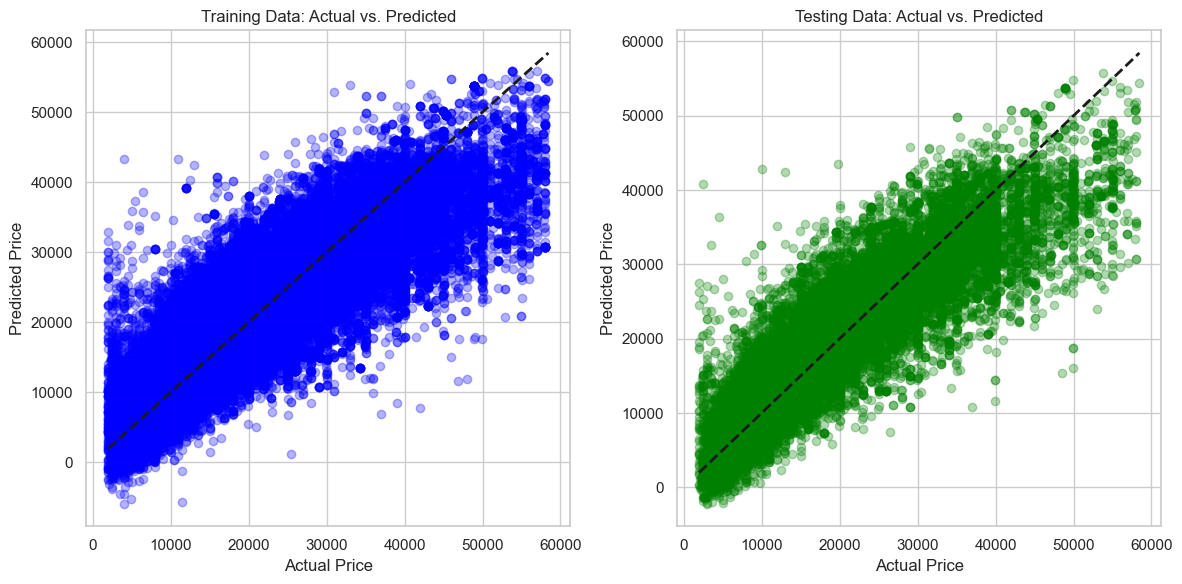

In [280]:
# Scatter plot for training and test data predictions side by side for comparison

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].scatter(y_train, train_preds, alpha=0.3, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Line for perfect predictions
axes[0].set_title('Training Data: Actual vs. Predicted')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# Scatter plot for testing data predictions
axes[1].scatter(y_test, test_preds, alpha=0.3, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
axes[1].set_title('Testing Data: Actual vs. Predicted')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')

# Show the plot
plt.tight_layout()
plt.show()

### 1.1 use the target variable 'log_price' to fit the model

In [287]:
# do a model search based on the logged target vairble - 'price'

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train_log)  # Use the logged y_train here

best_degree = grid_search.best_params_['transformer__num__poly__degree']
best_score = -grid_search.best_score_  # Convert from negative MSE to positive

print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Mean Squared Error: {best_score}")

# Best model trained on logged prices
best_model = grid_search.best_estimator_

Best Polynomial Degree: 4
Best Mean Squared Error: 0.0818550110328117


In [278]:
grid_search.fit(X_train, y_train_log)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures())]),
                                                                         ['year',
                                                                          'log_odometer',
                                                                          'cylinders_numeric',
                                                                          'condition_numeric']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['fuel',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color',
                                                                          'manufacturer_grouped'])])),
                                       ('lin_reg', LinearRegression())]),
             param_grid={'transformer__num__poly__degree': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [288]:
train_preds_log = best_model.predict(X_train)
test_preds_log = best_model.predict(X_test)

In [290]:
# Check a few predictions to confirm they're logged
print(train_preds_log[:5])  
print(test_preds_log[:5])

[ 9.61003724 10.58123965  8.95580551  8.48247022 10.17194434]
[10.44607026  9.92419838 10.44100988 10.7731749   8.4869917 ]


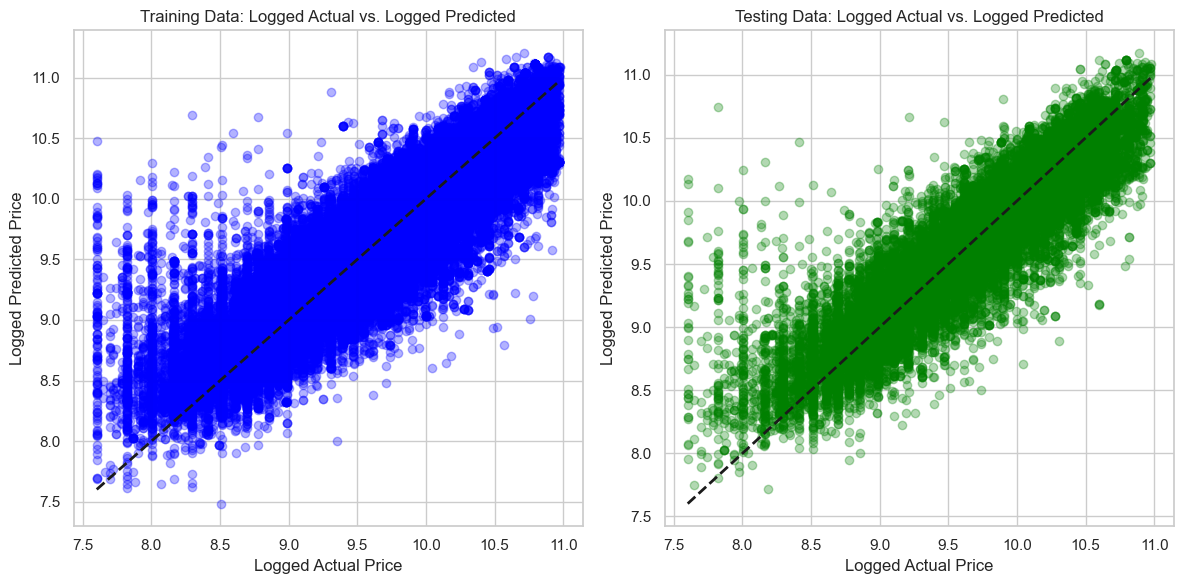

In [291]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for training data predictions (in log scale)
axes[0].scatter(y_train_log, train_preds_log, alpha=0.3, color='blue')
axes[0].plot([y_train_log.min(), y_train_log.max()], [y_train_log.min(), y_train_log.max()], 'k--', lw=2)  # Line for perfect predictions
axes[0].set_title('Training Data: Logged Actual vs. Logged Predicted')
axes[0].set_xlabel('Logged Actual Price')
axes[0].set_ylabel('Logged Predicted Price')

# Scatter plot for testing data predictions (in log scale)
axes[1].scatter(y_test_log, test_preds_log, alpha=0.3, color='green')
axes[1].plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'k--', lw=2)  # Line for perfect predictions
axes[1].set_title('Testing Data: Logged Actual vs. Logged Predicted')
axes[1].set_xlabel('Logged Actual Price')
axes[1].set_ylabel('Logged Predicted Price')

plt.tight_layout()
plt.show()

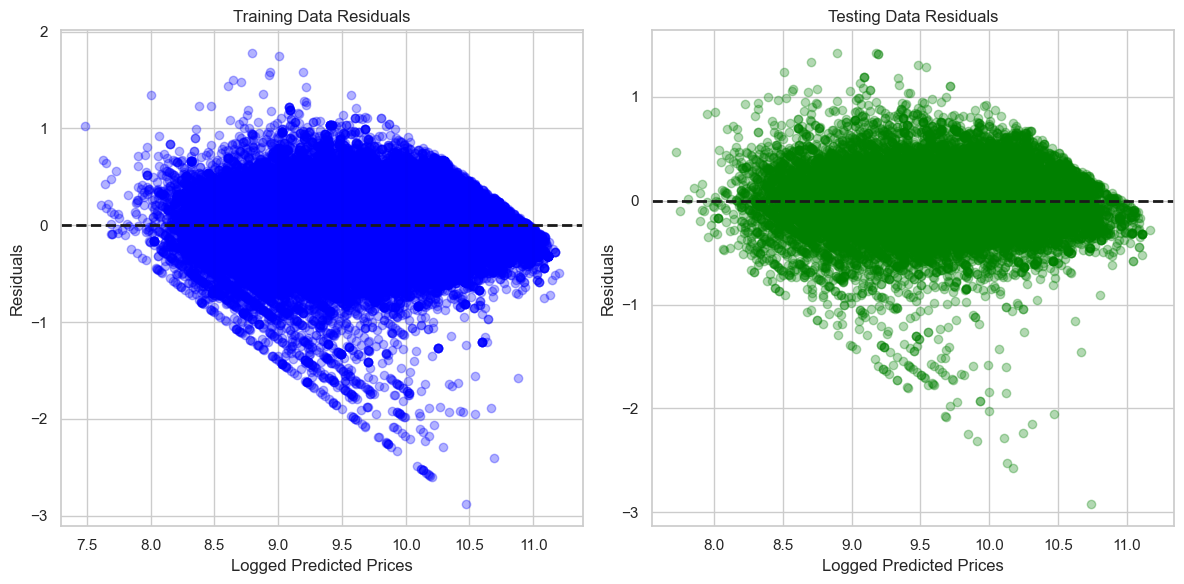

In [297]:
train_residuals = y_train_log - train_preds_log
test_residuals = y_test_log - test_preds_log

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Residual plot for training data
axes[0].scatter(train_preds_log, train_residuals, alpha=0.3, color='blue')
axes[0].axhline(y=0, color='k', linestyle='--', lw=2)
axes[0].set_title('Training Data Residuals')
axes[0].set_xlabel('Logged Predicted Prices')
axes[0].set_ylabel('Residuals')

# Residual plot for testing data
axes[1].scatter(test_preds_log, test_residuals, alpha=0.3, color='green')
axes[1].axhline(y=0, color='k', linestyle='--', lw=2)
axes[1].set_title('Testing Data Residuals')
axes[1].set_xlabel('Logged Predicted Prices')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

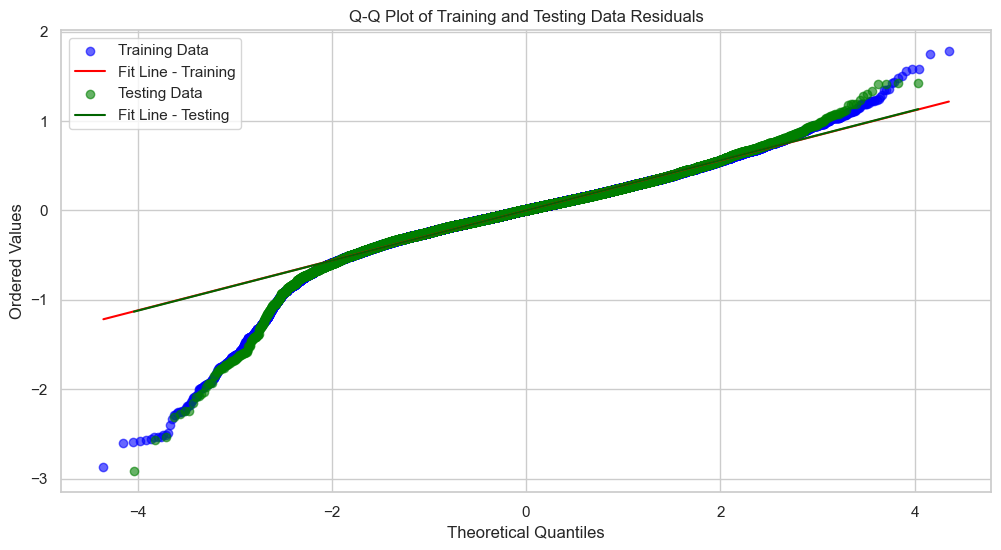

In [303]:


# Generate Q-Q plot data for training and testing dataset 

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Calculate residuals
train_residuals = y_train_log - train_preds_log
test_residuals = y_test_log - test_preds_log

fig, ax = plt.subplots(figsize=(12, 6))

(train_qq, train_qq_line) = stats.probplot(train_residuals, dist="norm")
(test_qq, test_qq_line) = stats.probplot(test_residuals, dist="norm")

# Plot the training data residuals
ax.scatter(train_qq[0], train_qq[1], color='blue', label='Training Data', alpha=0.6)
# Plot the regression line for training data
ax.plot(train_qq[0], train_qq_line[1] + train_qq_line[0]*train_qq[0], color='red', label='Fit Line - Training')

# Plot the testing data residuals
ax.scatter(test_qq[0], test_qq[1], color='green', label='Testing Data', alpha=0.6)
# Plot the regression line for testing data
ax.plot(test_qq[0], test_qq_line[1] + test_qq_line[0]*test_qq[0], color='darkgreen', label='Fit Line - Testing')

# Set plot titles and labels
ax.set_title('Q-Q Plot of Training and Testing Data Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Ordered Values')

# Add legend
ax.legend()

plt.show()

In [304]:
# compute R square to select the best model
r_squared_train = best_model.score(X_train, y_train_log)
print(f"R-squared for Training Data: {r_squared_train:.4f}")

# Calculate R-squared on Testing Data
r_squared_test = best_model.score(X_test, y_test_log)
print(f"R-squared for Testing Data: {r_squared_test:.4f}")

R-squared for Training Data: 0.8145
R-squared for Testing Data: 0.8128


In [362]:
# check the length of best model's coeffients
ridge_model = best_model.named_steps['ridge']

# Extract coefficients
coefficients = ridge_model.coef_

# Get feature names from the transformer within the pipeline
feature_names = best_model.named_steps['transformer'].get_feature_names_out()

# Ensure the number of feature names matches the number of coefficients
print(f"Number of coefficients: {len(coefficients)}")
print(f"Number of features: {len(feature_names)}")

Number of coefficients: 76
Number of features: 76


In [359]:

ridge_model = best_model.named_steps['ridge']

# Extract coefficients
coefficients = ridge_model.coef_

# Get feature names from the transformer within the pipeline
feature_names = best_model.named_steps['transformer'].get_feature_names_out()

# Combine feature names and coefficients into a DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


In [374]:
# find the top 30 coefficents sorted by decending to understand the importance of each feature listed to predict a car's price. 
top_30_coef = coef_df.sort_values(by='Coefficient', key=abs, ascending=False).head(30)

# Display the top 20 coefficients
print(top_30_coef)

                               Feature  Coefficient
67          manufacturer_grouped_lexus     0.381151
42                      type_hatchback    -0.316577
48                          type_truck     0.314666
1                                 year     0.298979
15                         fuel_diesel     0.282618
47                          type_sedan    -0.261179
46                         type_pickup     0.251115
44                        type_offroad     0.233091
2                         log_odometer    -0.224713
24                           drive_fwd    -0.221129
71         manufacturer_grouped_nissan    -0.208442
73         manufacturer_grouped_subaru    -0.197600
66            manufacturer_grouped_kia    -0.190155
52          manufacturer_grouped_acura     0.187823
56       manufacturer_grouped_cadillac     0.178061
17                            fuel_gas    -0.173444
58       manufacturer_grouped_chrysler    -0.172266
70  manufacturer_grouped_mercedes-benz     0.162357
50          

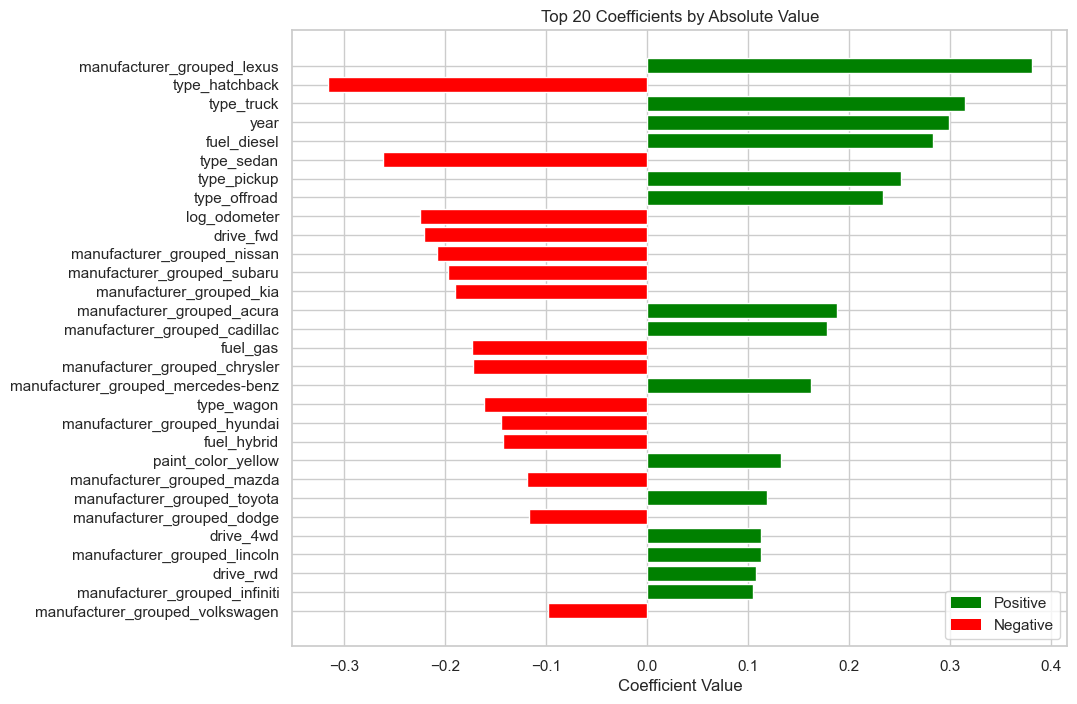

In [376]:

# plot the top coefficients with featur method, and show the sign of coefficient 
import matplotlib.pyplot as plt

# Create a color list based on the sign of the coefficients
colors = ['green' if x > 0 else 'red' for x in top_30_coef['Coefficient']]

# Plotting the top 20 coefficients with color coding
plt.figure(figsize=(10, 8))
bars = plt.barh(top_30_coef['Feature'], top_30_coef['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Top 20 Coefficients by Absolute Value')
plt.gca().invert_yaxis()  # Invert the y-axis to show the largest at the top

# Adding a legend to explain the colors
green_patch = plt.Rectangle((0, 0), 1, 1, fc="green", edgecolor = 'none')
red_patch = plt.Rectangle((0, 0), 1, 1, fc='red', edgecolor = 'none')
plt.legend([green_patch, red_patch], ['Positive', 'Negative'], loc='lower right')


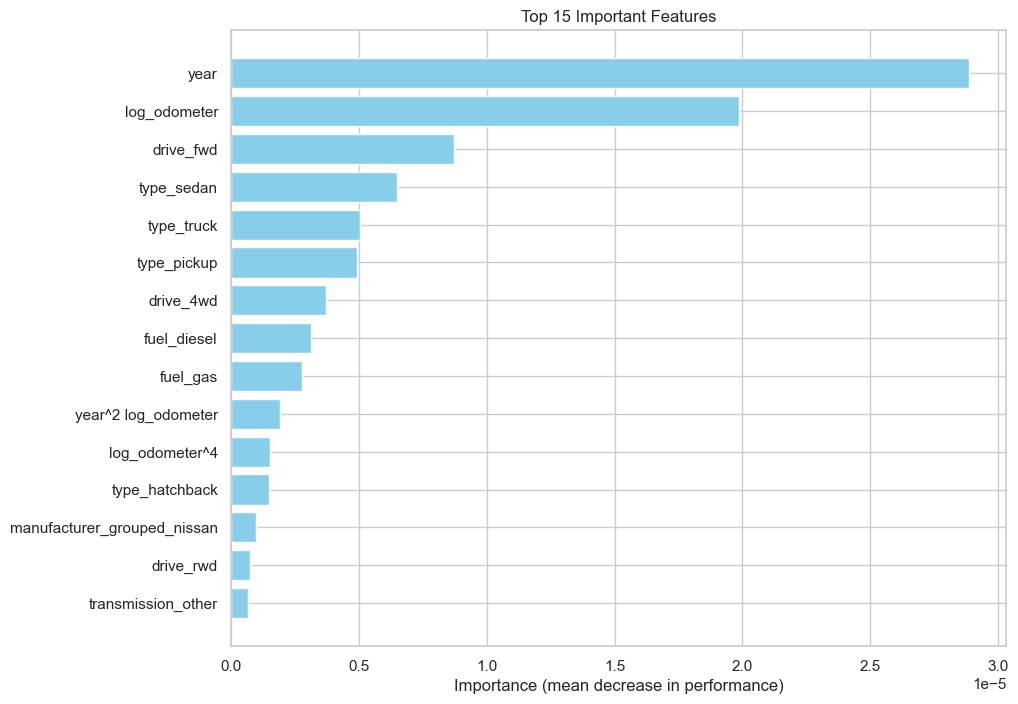

In [378]:
ploting variable important based on their importance 
ridge_model = best_model.named_steps['ridge']

# Transform X_test using the complete pipeline up to the model (but not including the model)
# It's crucial to use .transform() and not .predict() for permutation importance.
X_test_transformed = best_model.named_steps['transformer'].transform(X_test)

# If the output is a sparse matrix, convert it to a dense matrix
if hasattr(X_test_transformed, "toarray"):
    X_test_transformed = X_test_transformed.toarray()

try:
    # Calculate permutation importance
    result = permutation_importance(
        ridge_model,  # The model (Ridge regression in this case)
        X_test_transformed,  # The transformed test data
        y_test,  # Actual target values
        n_repeats=10,  # Number of times to permute a feature
        random_state=42,  # Seed for reproducibility
        n_jobs=-1  # Use all available cores
    )

    # Creating a DataFrame to store the feature names and their corresponding importance scores
    feature_names = best_model.named_steps['transformer'].get_feature_names_out()
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': result.importances_mean
    })

    # Sorting the features by importance and plotting the top 10
    top_features = importance_df.sort_values(by='Importance', ascending=False).head(15)
    plt.figure(figsize=(10, 8))
    plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
    plt.xlabel('Importance (mean decrease in performance)')
    plt.title('Top 15 Important Features')
    plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
    plt.show()

except Exception as e:
    print(f"Error calculating permutation importance: {e}")

## Modelling Approach #2  Ridge

In [310]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

column_trans = make_column_transformer(
    (StandardScaler(), ['year', 'log_odometer']),
    (OneHotEncoder(handle_unknown='ignore'), ['fuel', 'transmission', 'drive', 'paint_color', 'type', 'manufacturer_grouped']),
    verbose_feature_names_out=False
)

In [311]:
### Setup Ridge Regression pipeline and grid search for hyperparameter alpha-regularization
ridge_param_dict = {'ridge__alpha': np.logspace(-5, 5, 50)}
pipe = Pipeline([
    ('transformer', column_trans),
    ('ridge', Ridge())
])
grid = GridSearchCV( pipe, param_grid = ridge_param_dict, cv =5 )

In [312]:
grid.fit( X_train, y_train )

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'log_odometer']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['fuel',
                                                                          'transmission',
                                                                          'drive',
                                                                          'paint_color',
                                                                          'type',
                                                                          'manufacturer_grouped'])],
                                                          verbose_feature_names_out=False)),
                                       ('ridge', Ridge())]),
             param_grid={'rid...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])})

In [313]:
best_model = grid.best_estimator_
best_alpha = grid.best_params_
best_alpha_str=(f'Optimal alpha: {list(best_alpha.values())[0].round(3)}')
train_mse = mean_squared_error(y_train, best_model.predict(X_train))
test_mse = mean_squared_error(y_test, best_model.predict(X_test))
best_mse_str=(f'MSE: Training={train_mse: .4f}, Test={test_mse: .4f}')
train_mae = median_absolute_error( y_train, best_model.predict(X_train) )
test_mae = median_absolute_error( y_train, best_model.predict(X_train) )
best_mae_str=(f'MAE: Training={train_mae: .4f}, Test={test_mae: .4f}')
print(best_mae_str)
print(best_mse_str)
print(best_alpha_str)



MAE: Training= 3339.4714, Test= 3339.4714
MSE: Training= 34936293.0479, Test= 34570674.9742
Optimal alpha: 8.286


In [314]:
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

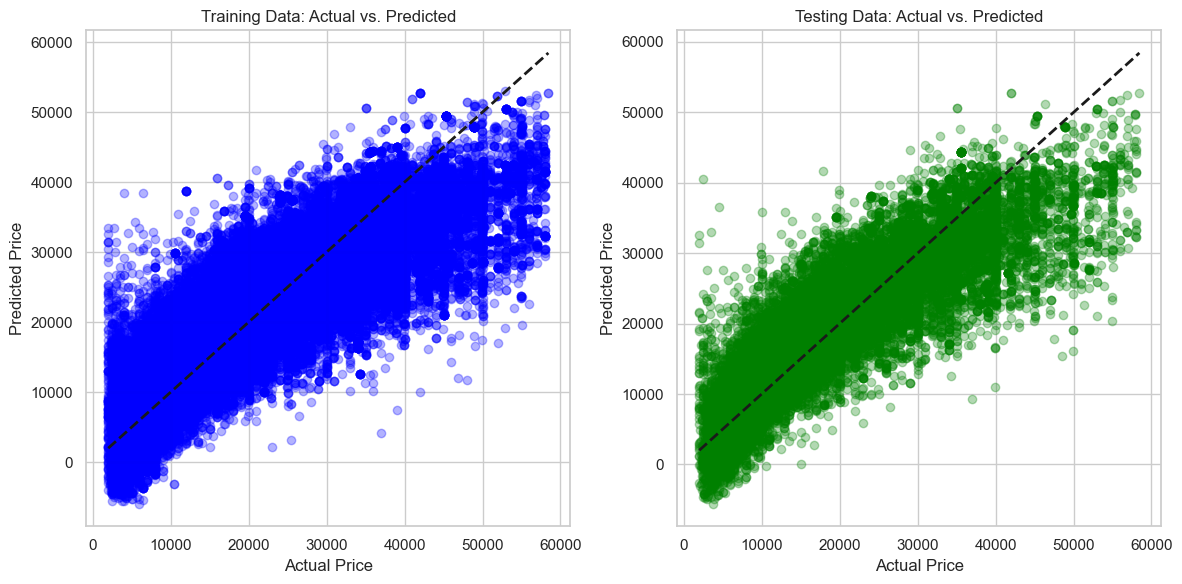

In [315]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for training data predictions
axes[0].scatter(y_train, train_preds, alpha=0.3, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Line for perfect predictions
axes[0].set_title('Training Data: Actual vs. Predicted')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# Scatter plot for testing data predictions
axes[1].scatter(y_test, test_preds, alpha=0.3, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
axes[1].set_title('Testing Data: Actual vs. Predicted')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')

# Show the plot
plt.tight_layout()
plt.show()

In [316]:

# Grid search to find the optimal alpha for the logged price.

grid = GridSearchCV(pipe, param_grid=ridge_param_dict, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train_log)  # Fit using the logged y_train

# Retrieve the best model
best_model = grid.best_estimator_

# Calculate metrics
train_mse = mean_squared_error(y_train_log, best_model.predict(X_train))
test_mse = mean_squared_error(y_test_log, best_model.predict(X_test))
train_mae = median_absolute_error(y_train_log, best_model.predict(X_train))
test_mae = median_absolute_error(y_test_log, best_model.predict(X_test))

# Print metrics
print(f'MAE: Training={train_mae:.4f}, Test={test_mae:.4f}')
print(f'MSE: Training={train_mse:.4f}, Test={test_mse:.4f}')
print(f'Optimal alpha: {grid.best_params_["ridge__alpha"]:.3f}')

# Make predictions
train_preds_log = best_model.predict(X_train)
test_preds_log = best_model.predict(X_test)

MAE: Training=0.1884, Test=0.1909
MSE: Training=0.1025, Test=0.1034
Optimal alpha: 8.286


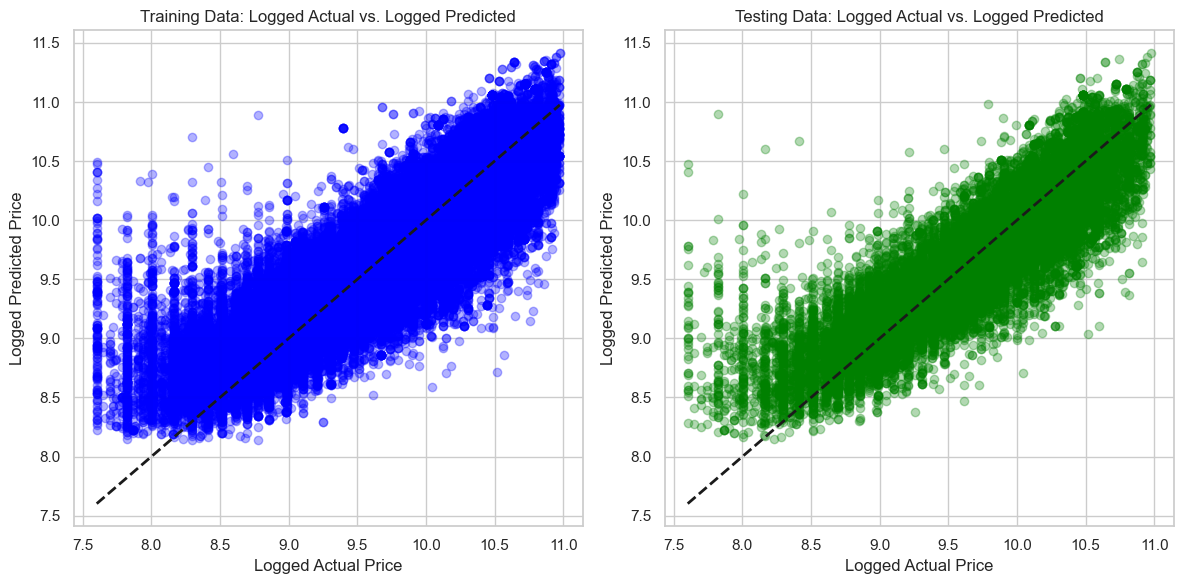

In [317]:
# Plotting directly with logged predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for training data predictions in logged scale
train_preds_log = best_model.predict(X_train)
axes[0].scatter(y_train_log, train_preds_log, alpha=0.3, color='blue')
axes[0].plot([y_train_log.min(), y_train_log.max()], [y_train_log.min(), y_train_log.max()], 'k--', lw=2)  # Line for perfect predictions
axes[0].set_title('Training Data: Logged Actual vs. Logged Predicted')
axes[0].set_xlabel('Logged Actual Price')
axes[0].set_ylabel('Logged Predicted Price')

# Scatter plot for testing data predictions in logged scale
test_preds_log = best_model.predict(X_test)
axes[1].scatter(y_test_log, test_preds_log, alpha=0.3, color='green')
axes[1].plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'k--', lw=2)  # Line for perfect predictions
axes[1].set_title('Testing Data: Logged Actual vs. Logged Predicted')
axes[1].set_xlabel('Logged Actual Price')
axes[1].set_ylabel('Logged Predicted Price')

plt.tight_layout()
plt.show()

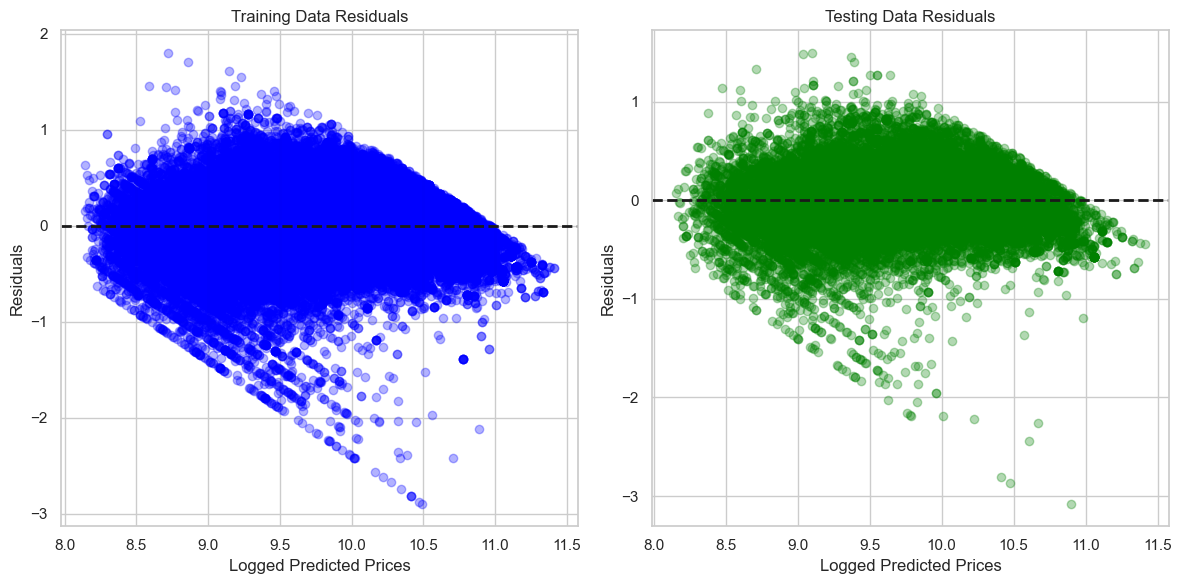

In [318]:
train_residuals = y_train_log - train_preds_log
test_residuals = y_test_log - test_preds_log

# Setup figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Residual plot for training data
axes[0].scatter(train_preds_log, train_residuals, alpha=0.3, color='blue')
axes[0].axhline(y=0, color='k', linestyle='--', lw=2)  # Line at 0 for no residual
axes[0].set_title('Training Data Residuals')
axes[0].set_xlabel('Logged Predicted Prices')
axes[0].set_ylabel('Residuals')

# Residual plot for testing data
axes[1].scatter(test_preds_log, test_residuals, alpha=0.3, color='green')
axes[1].axhline(y=0, color='k', linestyle='--', lw=2)  # Line at 0 for no residual
axes[1].set_title('Testing Data Residuals')
axes[1].set_xlabel('Logged Predicted Prices')
axes[1].set_ylabel('Residuals')

# Improve layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

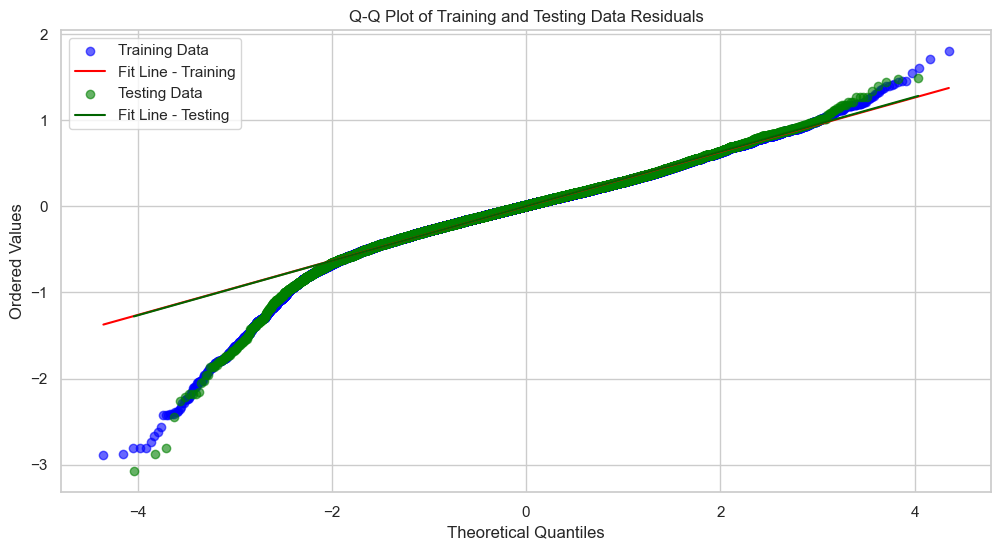

In [321]:
Plot QQ Plot with residuals shown wi

(train_qq, train_qq_line) = stats.probplot(train_residuals, dist="norm")
(test_qq, test_qq_line) = stats.probplot(test_residuals, dist="norm")

fig, ax = plt.subplots(figsize=(12, 6))

# Generate Q-Q plot data for training and testing
(train_qq, train_qq_line) = stats.probplot(train_residuals, dist="norm")
(test_qq, test_qq_line) = stats.probplot(test_residuals, dist="norm")

# Plot the training data residuals
ax.scatter(train_qq[0], train_qq[1], color='blue', label='Training Data', alpha=0.6)
# Plot the regression line for training data
ax.plot(train_qq[0], train_qq_line[1] + train_qq_line[0]*train_qq[0], color='red', label='Fit Line - Training')

# Plot the testing data residuals
ax.scatter(test_qq[0], test_qq[1], color='green', label='Testing Data', alpha=0.6)
# Plot the regression line for testing data
ax.plot(test_qq[0], test_qq_line[1] + test_qq_line[0]*test_qq[0], color='darkgreen', label='Fit Line - Testing')

# Set plot titles and labels
ax.set_title('Q-Q Plot of Training and Testing Data Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Ordered Values')

# Add legend
ax.legend()

plt.show()

In [322]:
# get r square
r_squared_train = best_model.score(X_train, y_train_log)
print(f"R-squared for Training Data: {r_squared_train:.4f}")

# Calculate R-squared on Testing Data
r_squared_test = best_model.score(X_test, y_test_log)
print(f"R-squared for Testing Data: {r_squared_test:.4f}")

R-squared for Training Data: 0.7670
R-squared for Testing Data: 0.7646


## Modelling Approach #3  Ridge with Polynomial

In [339]:
column_trans = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures())
        ]), ['year', 'log_odometer']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['fuel', 'transmission', 'drive', 'paint_color', 'type', 'manufacturer_grouped'])
    ],
    verbose_feature_names_out=False
)

# Define the parameter grid for Ridge regression
param_grid = {
    'transformer__num__poly__degree': [1, 2, 3, 4],  # Polynomial degrees
    'ridge__alpha': np.logspace(-5, 5, 50)  # Ridge regularization strengths
}

# Create a pipeline with the ColumnTransformer and Ridge regression
pipe = Pipeline([
    ('transformer', column_trans),
    ('ridge', Ridge())
])

In [340]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

In [341]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures())]),
                                                                         ['year',
                                                                          'log_odometer']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['fuel',
                                                                          'transmission',
                                                                          'drive',
                                                                          'paint_color',
                                                                          'type',
                                                                          'manufacturer_grouped'])],
                                                          verbose_feature_names_out=F...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'transformer__num__poly__degree': [1, 2, 3, 4]})

In [342]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [343]:
best_model = grid.best_estimator_
best_alpha = grid.best_params_['ridge__alpha']


# Evaluate on training data
train_predictions = best_model.predict(X_train)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)

# Evaluate on test data
test_predictions = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Best Alpha:", best_alpha)
print("Best Polynomial Degree:", best_degree)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)

Best Alpha: 0.00042919342601287783
Best Polynomial Degree: 2
Training MAE: 4343.966853167321
Training MSE: 34043273.72143958
Test MAE: 4325.153891514682
Test MSE: 33782508.83641666


In [344]:
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

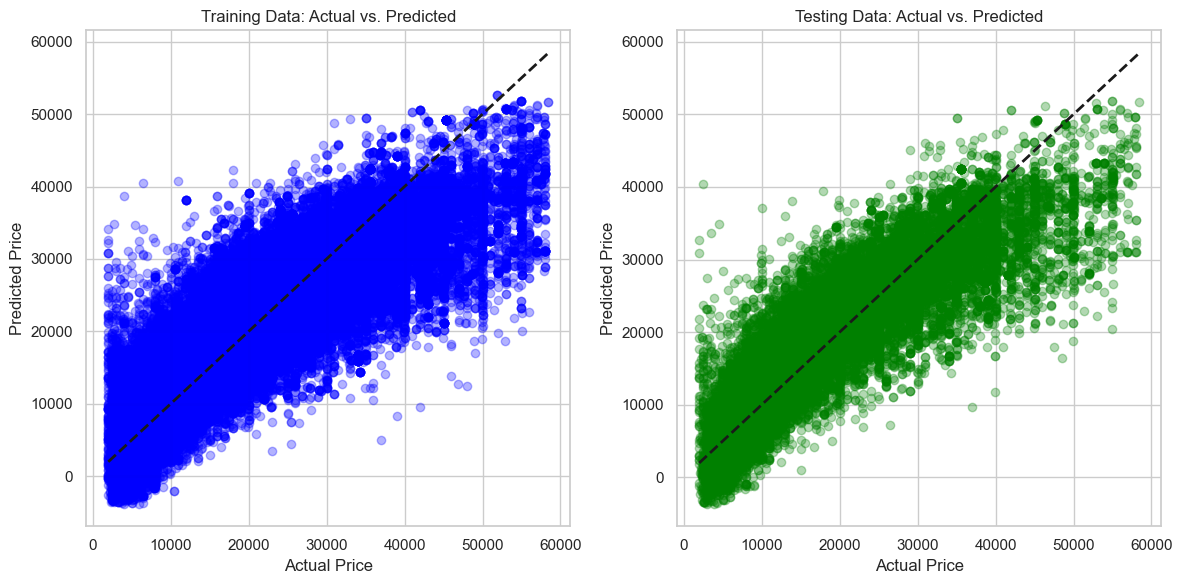

In [345]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for training data predictions
axes[0].scatter(y_train, train_preds, alpha=0.3, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Line for perfect predictions
axes[0].set_title('Training Data: Actual vs. Predicted')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# Scatter plot for testing data predictions
axes[1].scatter(y_test, test_preds, alpha=0.3, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
axes[1].set_title('Testing Data: Actual vs. Predicted')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')

# Show the plot
plt.tight_layout()
plt.show()

In [346]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train_log)  # Fit on logged target


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures())]),
                                                                         ['year',
                                                                          'log_odometer']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['fuel',
                                                                          'transmission',
                                                                          'drive',
                                                                          'paint_color',
                                                                          'type',
                                                                          'manufacturer_grouped'])],
                                                          verbose_feature_names_out=F...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'transformer__num__poly__degree': [1, 2, 3, 4]})

In [347]:
best_model = grid.best_estimator_

# Predictions (still in logged scale)
train_preds_log = best_model.predict(X_train)
test_preds_log = best_model.predict(X_test)

# Evaluate on training data (in log scale)
train_mae = mean_absolute_error(y_train_log, train_preds_log)
train_mse = mean_squared_error(y_train_log, train_preds_log)

# Evaluate on test data (in log scale)
test_mae = mean_absolute_error(y_test_log, test_preds_log)
test_mse = mean_squared_error(y_test_log, test_preds_log)

print("Best Alpha:", grid.best_params_['ridge__alpha'])
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)



Best Alpha: 0.49417133613238384
Training MAE: 0.23050398477538958
Training MSE: 0.09573746155009595
Test MAE: 0.2321125678283298
Test MSE: 0.09641483333824302


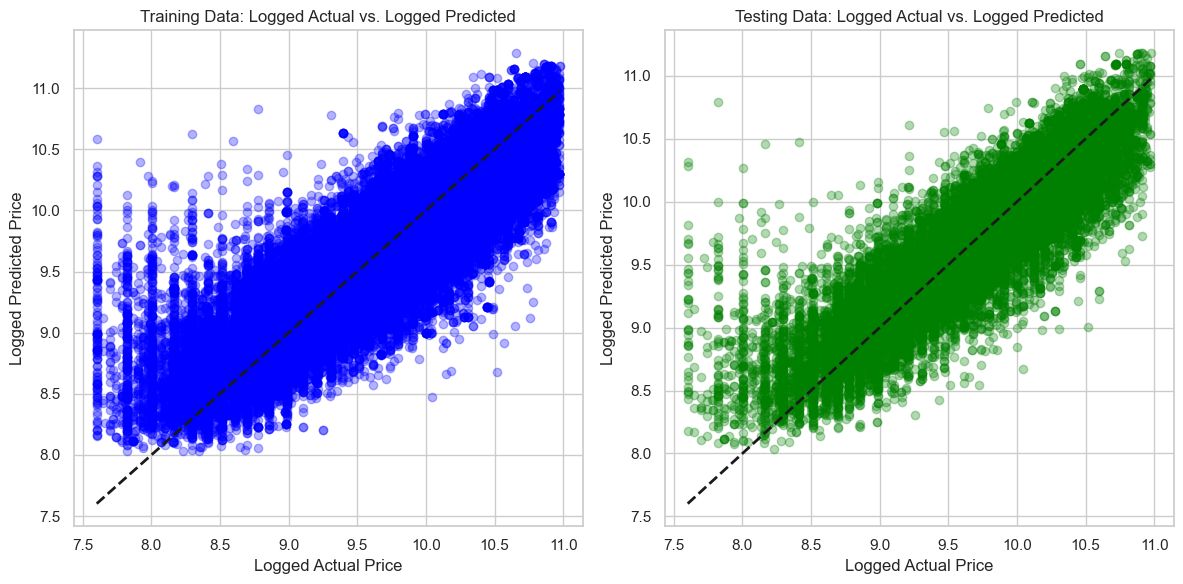

In [348]:
# Plotting in logged scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for training data predictions
axes[0].scatter(y_train_log, train_preds_log, alpha=0.3, color='blue')
axes[0].plot([y_train_log.min(), y_train_log.max()], [y_train_log.min(), y_train_log.max()], 'k--', lw=2)  # Line for perfect predictions
axes[0].set_title('Training Data: Logged Actual vs. Logged Predicted')
axes[0].set_xlabel('Logged Actual Price')
axes[0].set_ylabel('Logged Predicted Price')

# Scatter plot for testing data predictions
axes[1].scatter(y_test_log, test_preds_log, alpha=0.3, color='green')
axes[1].plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'k--', lw=2)  # Line for perfect predictions
axes[1].set_title('Testing Data: Logged Actual vs. Logged Predicted')
axes[1].set_xlabel('Logged Actual Price')
axes[1].set_ylabel('Logged Predicted Price')

plt.tight_layout()
plt.show()


In [350]:
r_squared_train = best_model.score(X_train, y_train_log)
print(f"R-squared for Training Data: {r_squared_train:.4f}")

# Calculate R-squared on Testing Data
r_squared_test = best_model.score(X_test, y_test_log)
print(f"R-squared for Testing Data: {r_squared_test:.4f}")

R-squared for Training Data: 0.7823
R-squared for Testing Data: 0.7805



With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.


### Evaluation results

Log transformaiton of the target variable ' price' create a better model in term of R squre

1.	Performance Metrics and Visualization: Apply residuals and QQ plot viz to verify model reliability and accuracy.
2.	Error Analysis: Utilize key metrics such as Mean Squared Error and Mean Absolute Error to evaluate model accuracy.
3.	Validation Techniques: Both Cross-Validation and Holdout Methods
    
Best Model is the ridge with Polynomial feature engineering technique


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.


### Model Effectiveness:
    
Performance Enhancement: The use of logged transformations alongside linear and Ridge regression models showed satisfactory performance. However, incorporating polynomial features markedly improved model accuracy. Visual analysis confirmed that log transformations corrected skewness in the data distribution, resulting in more accurate predictions.

### Key Features Impact:
Critical Variables: The most influential factors in determining car prices are the manufacturer, vehicle type, model year, odometer reading, and drive type. Fuel type and car paint, while considered, have a less pronounced effect on pricing.

### Inventory Optimization:
Popular Choices: Brands like Lexus, Acura, Cadillac, Mercedes, and Toyota, along with specific types such as trucks, pickups, and offroad vehicles, are highly sought after in the used car market. This indicates a strong consumer preference for reputable manufacturers and versatile vehicle types.

### Pricing Strategy:
Market Positioning: According to exploratory data analysis, trucks, pickups, and offroad vehicles command premium prices in the used car market. Conversely, sedans and hatchbacks from Kia, Subaru, Nissan, Toyota, Mazda, and others are abundant and positioned at the lower end of the market price spectrum.
Market Trends:
### Consumer Preferences: 
There is a noticeable trend where consumers are willing to pay more for high-end vehicles over lower-end but popular models. Interestingly, while paint color generally does not significantly impact car pricing, yellow vehicles (often associated with sports cars) command higher prices.

### Risk Management:
Strategic Inventory: Carrying newer vehicles from American brands equipped with four-wheel drive presents less market risk. The secondary car market shows a preference for economically priced vehicles, leading to higher demand for Japanese or Korean cars known for their reliability and value retention.


### Next Step

### Data Collection and Cleaning:

Initially containing over 400,000 records, the dataset was reduced to nearly 200,000 due to extensive missing values. Despite multiple attempts to clean and retain as many records as possible, I ultimately removed all missing values to improve model performance.

### Market Demand and Economic Factors:
Incorporating market demand and economic data could enhance the model by integrating demand-supply dynamics, providing a more accurate valuation of car prices.

### Computational Limitations: 
My computational resources limited the scope of model testing. I experimented with Lasso, sequential feature selection, and polynomial features (degree=4) but had to scale back due to the extensive computational demand of over 2,000 iterations with cross-validation.

### Feature Selection and Model Expansion: 

Initial attempts to segment cars into five price groups based on model and manufacturer. But the moder is so underperformed. Future efforts will focus on more granular feature selection and leveraging robust data sources to refine the model's accuracy and predictive power.